# MD004 ENTREGA6 ANÁLISIS DE COMPONENTES PRINCIPALES

**Descripción de la tarea:**

El fichero 20230119_DatosBoston incluye datos de precios del mercado de viviendas de Boston (median_value), así como datos adicionales sobre la ubicación de la vivienda y otros datos sociodemográficos. La descripción de las columnas del dataset es la que sigue:

- **crime_index**: Índice de criminalidad de la zona
- **urban_ratio**: Ratio de zona urbana residencial sobre el total
- **industry_ratio**: Ratio de industria de la zona
- **c_river_variable**: 1 si la zona colinda con un río y 0 si no
- **nox_concentration**: Concentración de óxido nitroso en la zona
- **rooms_per_dwelling**: Número de habitaciones medio por vivienda
- **dwelling_age**: “Edad” media de la vivienda
- **dwelling_dist**: Distancia media ponderada con los centros urbanos de la ciudad
- **highway_index**: Índice de accesibilidad sobre autopistas cercanas
- **tax_ratio**: Índice de tasas por cada 10000usd
- **teacher_ratio**: Ratio de alumno por profesor
- **racial_index**: Índice de proporción de población no caucásica
- **lower_status**: Porcentaje de población de “clase-baja”
- **median_value**: Valor medio de precio de la vivienda (En 1000USD)

**Se pide:**



## 1. **Visualización y familiarización del dataset (2p)**



## <font color='#3d59c6'>  1.1 CARGA DE PACKAGES </font>

In [131]:
library(tidyverse)
library(ggplot2)
library(gridExtra)
library(corrplot)
library(caret)
library(nortest)

library(broom)
library(lmtest)




## <font color='#3d59c6'>  1.2 CARGA DE DATOS </font>

In [132]:
data_boston = read.csv(file='20230119_DatosBoston.csv', header=TRUE, sep=';', dec='.')
head(data_boston)
tail(data_boston)

crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
0.00632,18,2.31,0,0.538,6.575,65.2,4.090,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,49.671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,49.671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,60.622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,60.622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,60.622,3,222,18.7,394.12,5.21,28.7


,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
501,0.22438,0,9.69,0,0.585,6.027,79.7,24.982,6,391,19.2,396.90,14.33,16.8
502,0.06263,0,11.93,0,0.573,6.593,69.1,24.786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0,11.93,0,0.573,6.120,76.7,22.875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0,11.93,0,0.573,6.976,91.0,21.675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0,11.93,0,0.573,6.794,89.3,23.889,1,273,21.0,393.45,6.48,22.0
506,0.04741,0,11.93,0,0.573,6.030,80.8,2.505,1,273,21.0,396.90,7.88,11.9


De nuevo, al usar la función **head()** y **tail()** obtenemos un primer vistazo a nustros datos. En este caso, podemos ver como contamos con una cantidad de datos decente, en donde, a priori, no hay presencia de variables categóricas.

## <font color='#3d59c6'>  1.3. VISUALIZACIÓN Y COMPRENSIÓN DEL DATASET </font>

In [133]:
str(data_boston)
dim(data_boston)

is.null(data_boston)

any(duplicated(data_boston))

'data.frame':	506 obs. of  14 variables:
 $ crime_index       : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ urban_ratio       : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ industry_ratio    : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ c_river_variable  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox_concentration : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rooms_per_dwelling: num  6.58 6.42 7.18 7 7.15 ...
 $ dwelling_age      : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dwelling_dist     : num  4.09 49.67 49.67 60.62 60.62 ...
 $ highway_index     : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax_ratio         : int  296 242 242 222 222 222 311 311 311 311 ...
 $ teacher_ratio     : num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ racial_index      : num  397 397 393 395 397 ...
 $ lower_status      : num  4.98 9.14 4.03 2.94 5.33 ...
 $ median_value      : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


[1] 506  14

[1] FALSE

[1] FALSE

Si entramos más en detalle en los datos, vemos como tenemos **506** observaciones con **8** variables que describen cada una. Aunque en primera instacia parece que no hay categóricas, observamos como la variable c_river_variable nos indica si hay presencia de río o no, lo que nos hace tratarla como una categórica.

Adicionalmente, observamos como no hay presenica de nulls ni instáncias repetidas

### <font color='#3d59c6'>  1.3.1 Variables numéricas </font>

In [134]:
data_boston_numericas = data_boston %>%
  select_if(is.numeric)

data_boston_cat = data_boston_numericas["c_river_variable"]

data_boston_numericas <- data_boston_numericas[, !colnames(data_boston_numericas) %in% c("c_river_variable")]

head(data_boston_numericas)
summary(data_boston_numericas)

crime_index,urban_ratio,industry_ratio,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
0.00632,18,2.31,0.538,6.575,65.2,4.090,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0.469,6.421,78.9,49.671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0.469,7.185,61.1,49.671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0.458,6.998,45.8,60.622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0.458,7.147,54.2,60.622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0.458,6.430,58.7,60.622,3,222,18.7,394.12,5.21,28.7


  crime_index        urban_ratio     industry_ratio  nox_concentration
 Min.   :  0.0063   Min.   :  0.00   Min.   : 0.46   Min.   :0.3850   
 1st Qu.:  0.0820   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.4490   
 Median :  0.2565   Median :  0.00   Median : 9.69   Median :0.5380   
 Mean   :131.6957   Mean   : 11.36   Mean   :11.14   Mean   :0.5547   
 3rd Qu.:143.3370   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.6240   
 Max.   :996.6540   Max.   :100.00   Max.   :27.74   Max.   :0.8710   
 rooms_per_dwelling  dwelling_age    dwelling_dist     highway_index   
 Min.   :3.561      Min.   :  2.90   Min.   :  1.137   Min.   : 1.000  
 1st Qu.:5.886      1st Qu.: 45.02   1st Qu.: 17.930   1st Qu.: 4.000  
 Median :6.208      Median : 77.50   Median : 27.533   Median : 5.000  
 Mean   :6.285      Mean   : 68.57   Mean   : 33.837   Mean   : 9.549  
 3rd Qu.:6.623      3rd Qu.: 94.08   3rd Qu.: 47.648   3rd Qu.:24.000  
 Max.   :8.780      Max.   :100.00   Max.   :121.265   Max.   :24.000  

Vamos a analizar las variables numéricas (en su totalidad, después entraremos en detalle con la variable objectivo). 

Dado el poco conocimiento del dominio, no se pueden sacar concluisones claras simplemente observando los resultados extraídos. Aún así, podemos predecir que hay ciertas variables que no seguiran una **distribución normal** o tienen **outliers**.

In [166]:
data_boston$c_river_variable <- factor(data_boston$c_river_variable)

data_boston_summary = data_boston %>%
  group_by(c_river_variable) %>%
      summarize(
        m_cr = mean(crime_index), sd_cr = sd(crime_index) 
        , m_ur = mean(urban_ratio), sd_ur = sd(urban_ratio)
        , m_ir = mean(industry_ratio), sd_ir = sd(industry_ratio)
        , m_nc = mean(nox_concentration), sd_nc = sd(nox_concentration)
        , m_rd = mean(rooms_per_dwelling), sd_rd = sd(rooms_per_dwelling)
        , m_da = mean(dwelling_age), sd_da = sd(dwelling_age)
        , m_dd = mean(dwelling_dist), sd_dd = sd(dwelling_dist)
        , m_hi = mean(highway_index), sd_hi = sd(highway_index)
        , m_tr = mean(tax_ratio), sd_tr = sd(tax_ratio)
        , m_ter = mean(teacher_ratio), sd_ter = sd(teacher_ratio)
        , m_ri = mean(racial_index), sd_ri = sd(racial_index)
        , m_ls = mean(lower_status), sd_ls = sd(lower_status)
        , m_mv = mean(median_value), sd_mv = sd(median_value))

diff_row = data_boston_summary %>%
  summarise(c_river_variable = "diff_river",
        m_cr = diff(m_cr), sd_cr = diff(sd_cr) 
        , m_ur = diff(m_ur), sd_ur = diff(sd_ur)
        , m_ir = diff(m_ir), sd_ir = diff(sd_ir)
        , m_nc = diff(m_nc), sd_nc = diff(sd_nc)
        , m_rd = diff(m_rd), sd_rd = diff(sd_rd)
        , m_da = diff(m_da), sd_da = diff(sd_da)
        , m_dd = diff(m_dd), sd_dd = diff(sd_dd)
        , m_hi = diff(m_hi), sd_hi = diff(sd_hi)
        , m_tr = diff(m_tr), sd_tr = diff(sd_tr)
        , m_ter = diff(m_ter), sd_ter = diff(sd_ter)
        , m_ri = diff(m_ri), sd_ri = diff(sd_ri)
        , m_ls = diff(m_ls), sd_ls = diff(sd_ls)
        , m_mv = diff(m_mv), sd_mv = diff(sd_mv))

data_boston_summary = bind_rows(data_boston_summary, diff_row)
c(data_boston_summary)

Warning message in bind_rows_(x, .id):
“binding factor and character vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”

$c_river_variable
[1] "0"          "1"          "diff_river"

$m_cr
[1] 129.4202 162.3168  32.8966

$sd_cr
[1] 245.79224 256.05782  10.26558

$m_ur
[1] 11.634820  7.714286 -3.920534

$sd_ur
[1] 23.617979 18.800143 -4.817836

$m_ir
[1] 11.01919 12.71914  1.69995

$sd_ir
[1]  6.9138505  5.9576231 -0.9562274

$m_nc
[1] 0.55181699 0.59342571 0.04160873

$sd_nc
[1] 0.11310234 0.14473573 0.03163339

$m_rd
[1] 6.2671741 6.5196000 0.2524259

$sd_rd
[1] 0.6858948 0.8764160 0.1905211

$m_da
[1] 67.911677 77.500000  9.588323

$sd_da
[1] 28.458924 22.021340 -6.437584

$m_dd
[1]  34.53494  24.43860 -10.09634

$sd_dd
[1] 23.272017 14.597792 -8.674226

$m_hi
[1]  9.5668790  9.3142857 -0.2525933

$sd_hi
[1]  8.7484519  8.2489622 -0.4994897

$m_tr
[1] 409.87049 386.25714 -23.61335

$sd_tr
[1] 168.853790 165.012004  -3.841786

$m_ter
[1] 18.527176 17.491429 -1.035748

$sd_ter
[1]  2.1559577  2.0817656 -0.0741921

$m_ri
[1] 355.46104 372.99743  17.53639

$sd_ri
[1]  93.42354  53.38282 -40.04072

$m_ls
[1] 12.757941 11.241714 -1.516226

$sd_ls
[1]  7.1692713  6.6866507 -0.4826207

$m_mv
[1] 22.093843 28.440000  6.346157

$sd_mv
[1]  8.831362 11.816643  2.985281

Gracias a este análisis, podemos intuir el impacto de nuestra única variable categórica concorde con las otras variables, especialmente nuestra variable objetivo(median_value). De primeras, vemos como la concentración de óxido nitroso en la zona esta muy relacionado con la presencia de rios. Aunque esto requiera de un estudio más profundo, puede ser que en las zonas con presenica de rios haya, por consecuendia, mas actividad humana. Por el contrario, en las zonas con menos rios, no hay tanta actividad humana, ende no se genera tanto óxido nitroso. Aún así, como veremos más adelante, sacar este tipo de conclusiones puede no ser adecuado, debido a la posible descompensación de muestras entre categorías.

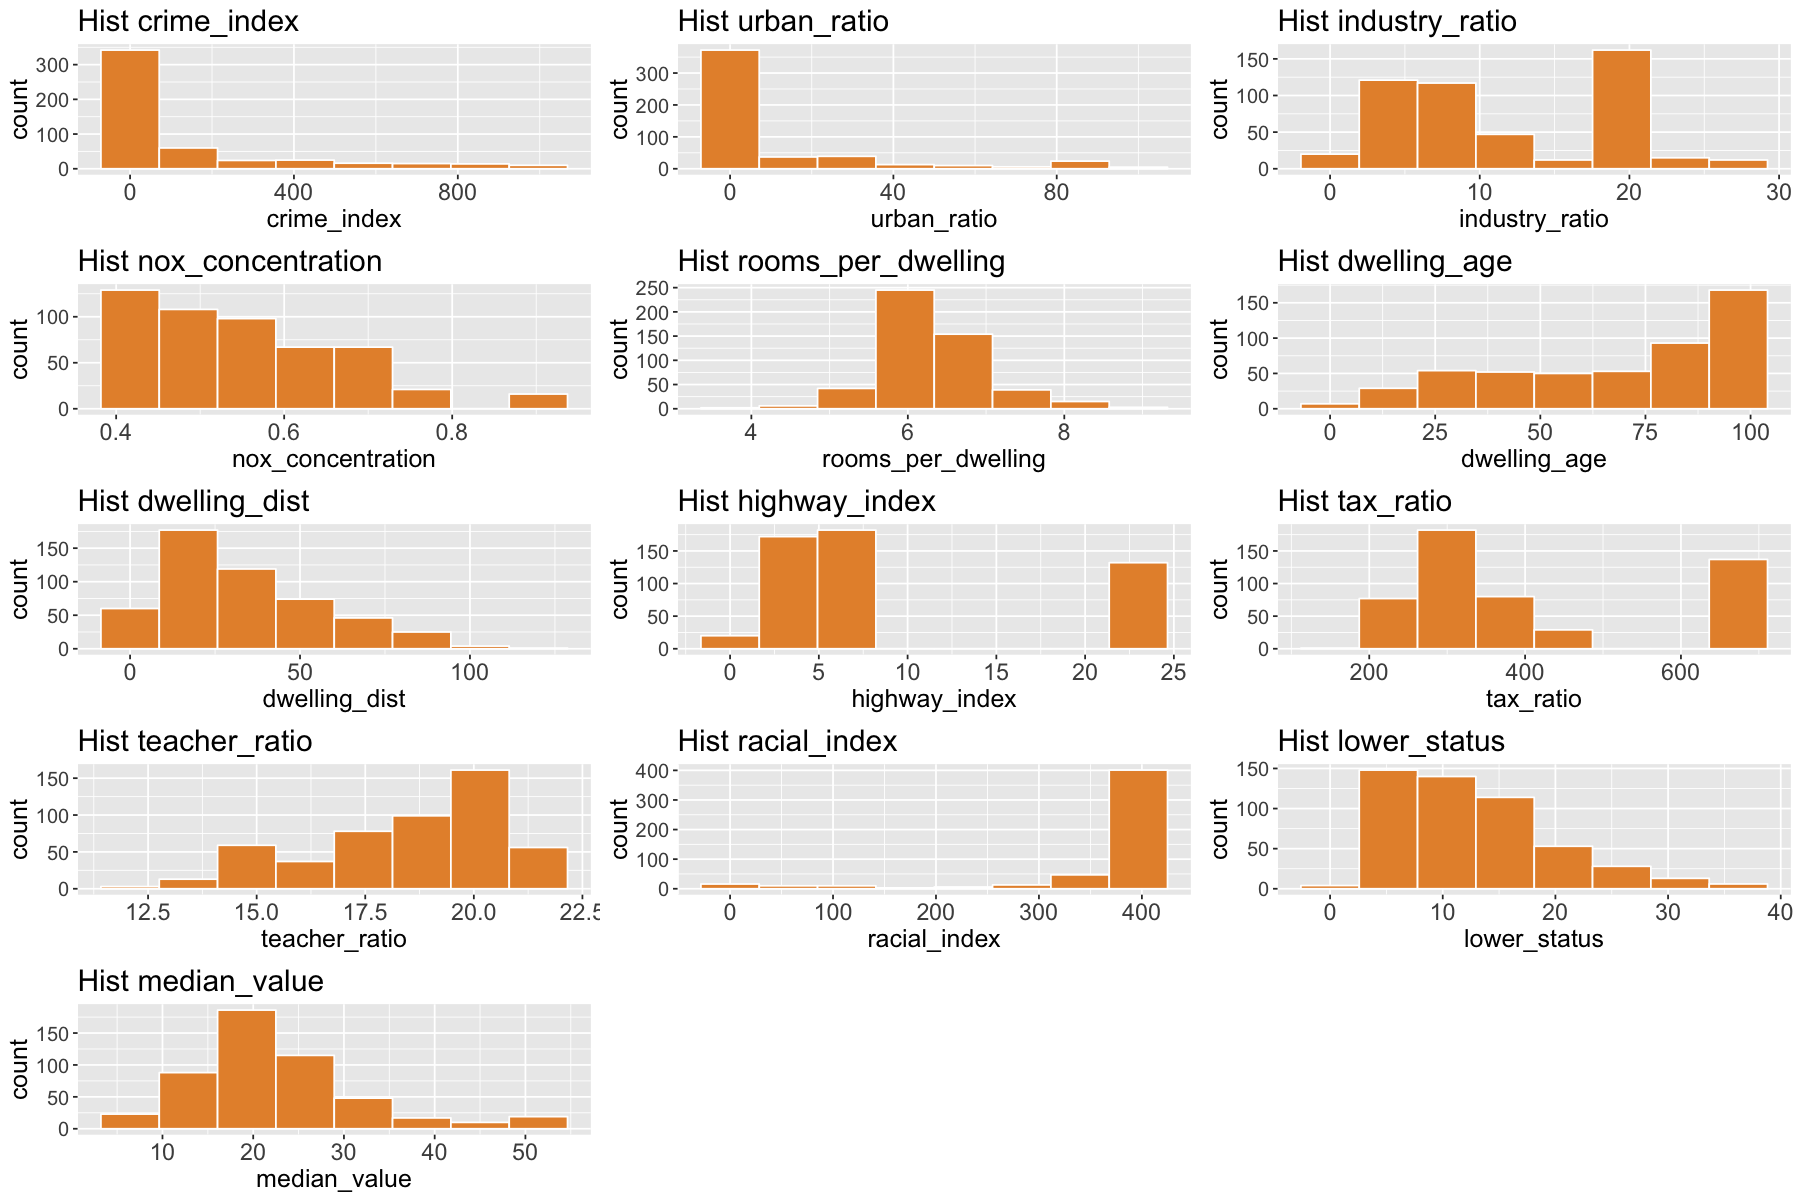

In [135]:
graficos_histograma = list()
var_data = colnames(data_boston_numericas)

for (variable in var_data) {

  grafico = ggplot(data_boston_numericas) +
    aes_string(x = variable) +
    geom_histogram(bins = 8, fill = '#e69138', color = 'white', na.rm = TRUE) +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste('Hist', variable))
  

  graficos_histograma[[length(graficos_histograma) + 1]] = grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 10  
)

do.call('grid.arrange', c(graficos_histograma, ncol = 3))

Tal y como habiamos observado, gran parte de nuestras variables no sigue una **distribución normal**. Antes de que suenen las alarmas, debemos observar si esta no gausiana es ocasionada por la propia naturaleza de la variable o, por otro lado, es debido a algun error en los datos/outliers. De nuevo, debido al poco dominio del conocimiento, detectar errores en los datos puede resultar difícil. Aun así, podemos confiar en que los datos no contienen errores, ya que las variables siguen unas tendencias adecuadas para lo que es la ciudad de Boston. Por ejemplo, el **criminal_index** tiene sentido que la mayoria tienda a zero, debido a que es una ciudad relativamente segura. Otro ejemplo seria el **racial_index**, ya que algunas áreas de Boston pueden tener concentraciones más altas de ciertos grupos étnicos debido a patrones históricos de migración y asentamiento. Otra variable que nos llama la atención es **highway_index**. Esta variable sigue un comportamiento esperado, ya que Boston es una ciudad costera, lo que implica que la presenica de autopistas estará mayoritariamente presente en las afueras.

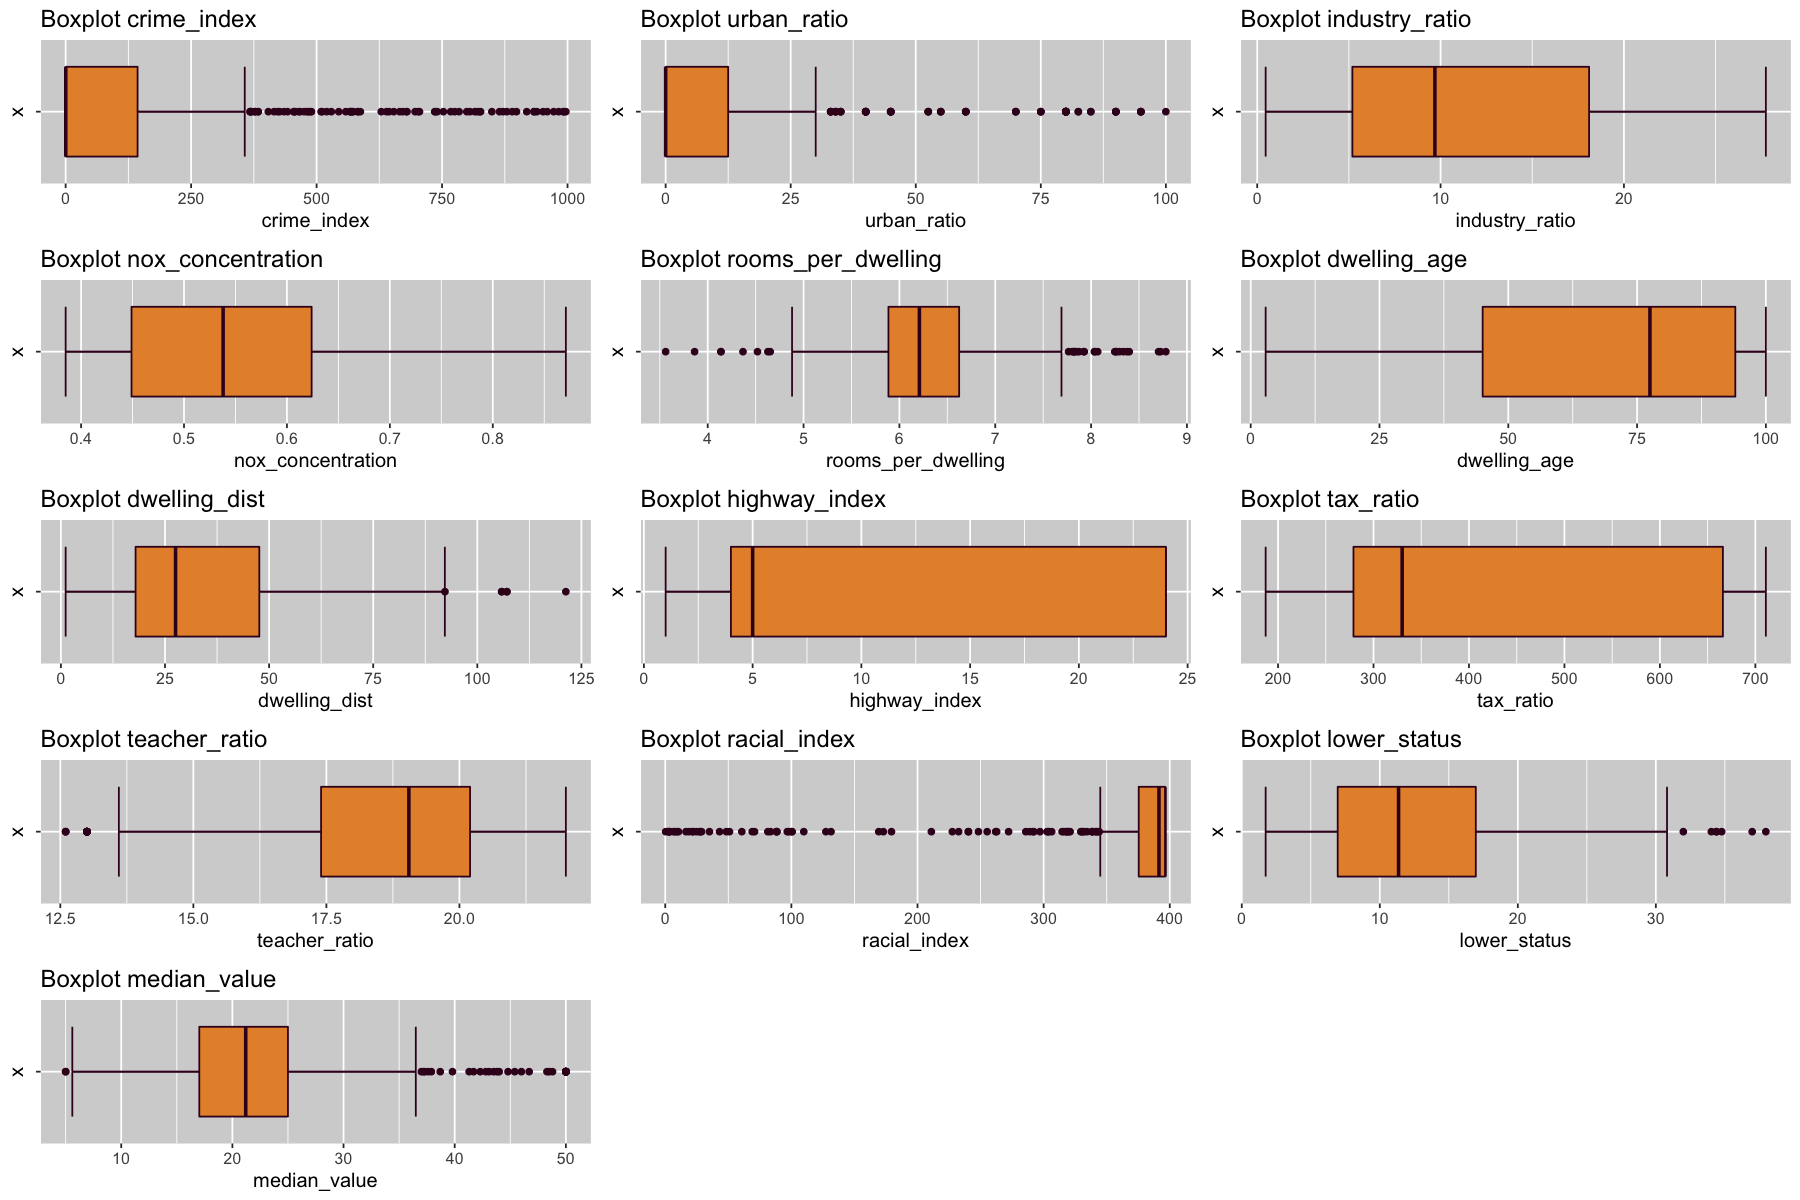

In [136]:
box_plots = list()
var_data = colnames(data_boston_numericas)

for (variable in var_data) {
  box_plot = ggplot(data_boston_numericas, aes(x = '', y = !!sym(variable))) +
    stat_boxplot(geom = 'errorbar', color = '#3c0023', na.rm = TRUE) +
    geom_boxplot(fill = '#e69138', color = '#3c0023', na.rm = TRUE) +
    coord_flip() +
    labs(title = paste('Boxplot', variable), y = variable) +
    theme(panel.background = element_rect(fill = 'lightgray'),
        panel.grid.major = element_line(color = 'white'),
        panel.grid.minor = element_line(color = 'white')) +
    theme(text = element_text(size = 12))
  box_plots[[variable]] = box_plot
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 10 
)
grid.arrange(grobs = box_plots, ncol = 3, widths = rep(2, 3))

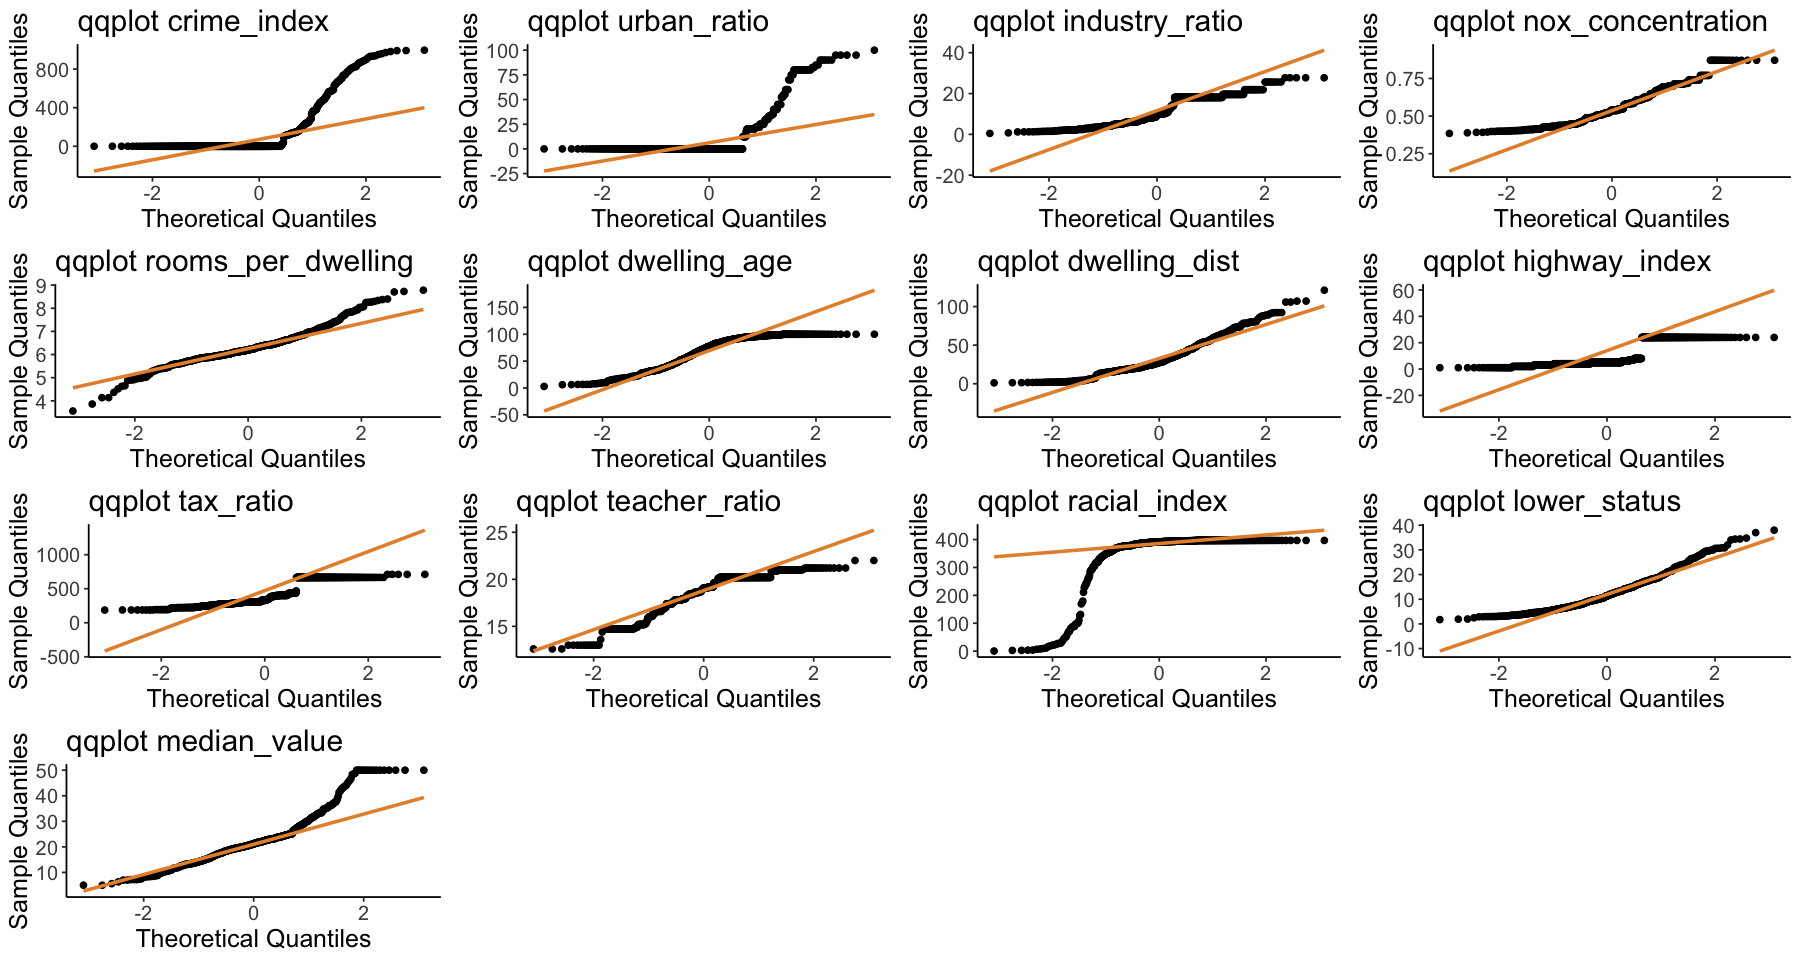

In [137]:
options(
  repr.plot.width = 15,  
  repr.plot.height = 8  
)
qq_plots = list()
var_data = colnames(data_boston_numericas)

for (i in seq_along(var_data)) {
  variable = var_data[i]
  qq_plot = ggplot(data_boston_numericas[!is.na(data_boston_numericas[[variable]]), ],aes(sample = !!sym(variable))) +
    stat_qq() +
    stat_qq_line(color ='#e69138', lwd = 1) +
    labs(title = paste('qqplot', variable),
         x = 'Theoretical Quantiles',
         y = 'Sample Quantiles') +
    theme_classic() +
    theme(text = element_text(size = 15))
  qq_plots[[i]] = qq_plot
}

grid.arrange(grobs = qq_plots, ncol = 4, widths = rep(2, 4))

Nuevamente, con los boxplots y los qqplots pertinentes podemos confirmar como algunas variables no siguen una distribución normal. Este hecho puede afectar a lo largo de nuestro análisis. Si resulta que las variables que mejor explican nuestra variable objectivo no sigue una distribución normal, los supuestos para hacer un Test ANOVA o una regresión pueden verse afectados, invalidando posiblemente el modelo generado. Antes de sacar dicha conclusión, vamos a examinar más en profundidad las variables que mejor se puedan adaptar a un modelo de regresión lineal (teniendo en cuenta nuestra variable objectivo).

Antes de ello, simplemente recordar que podemos seguir con nuestros análisis grácias al teorema del límite central. Para ello, hemos usado el siguiente código para demostrar que, efectivamente, las variables más problemáticas cumplen con dicha ley:

[1] 506


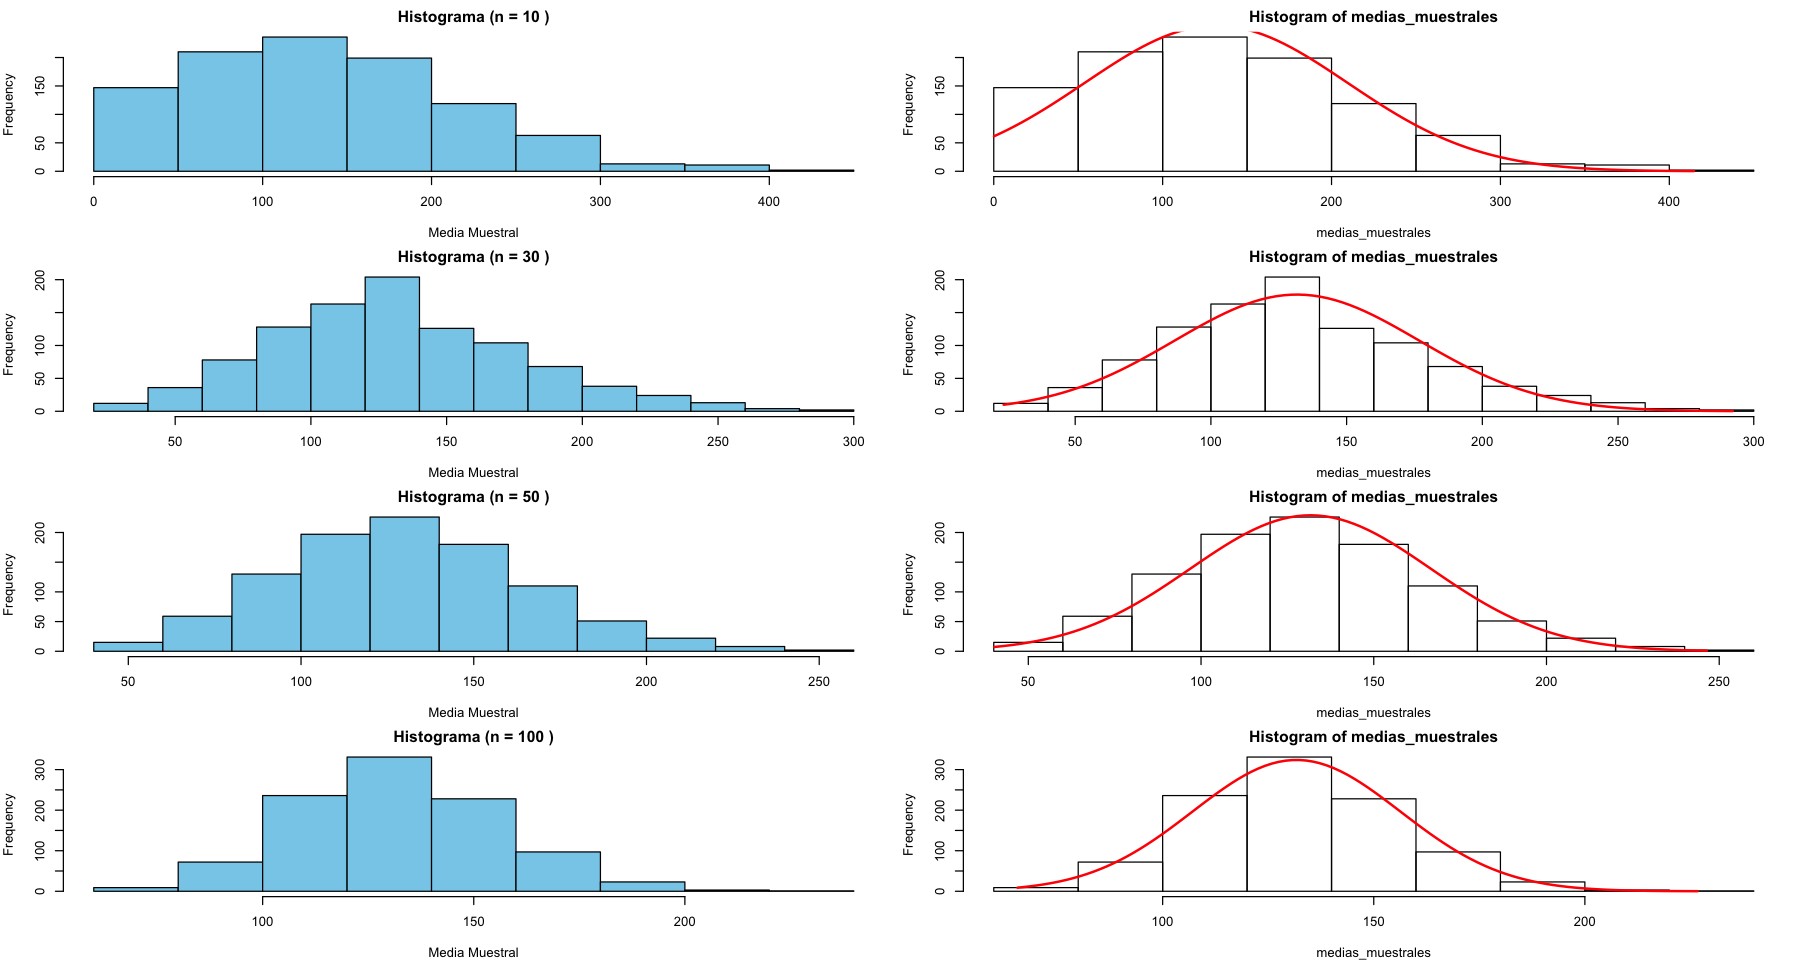

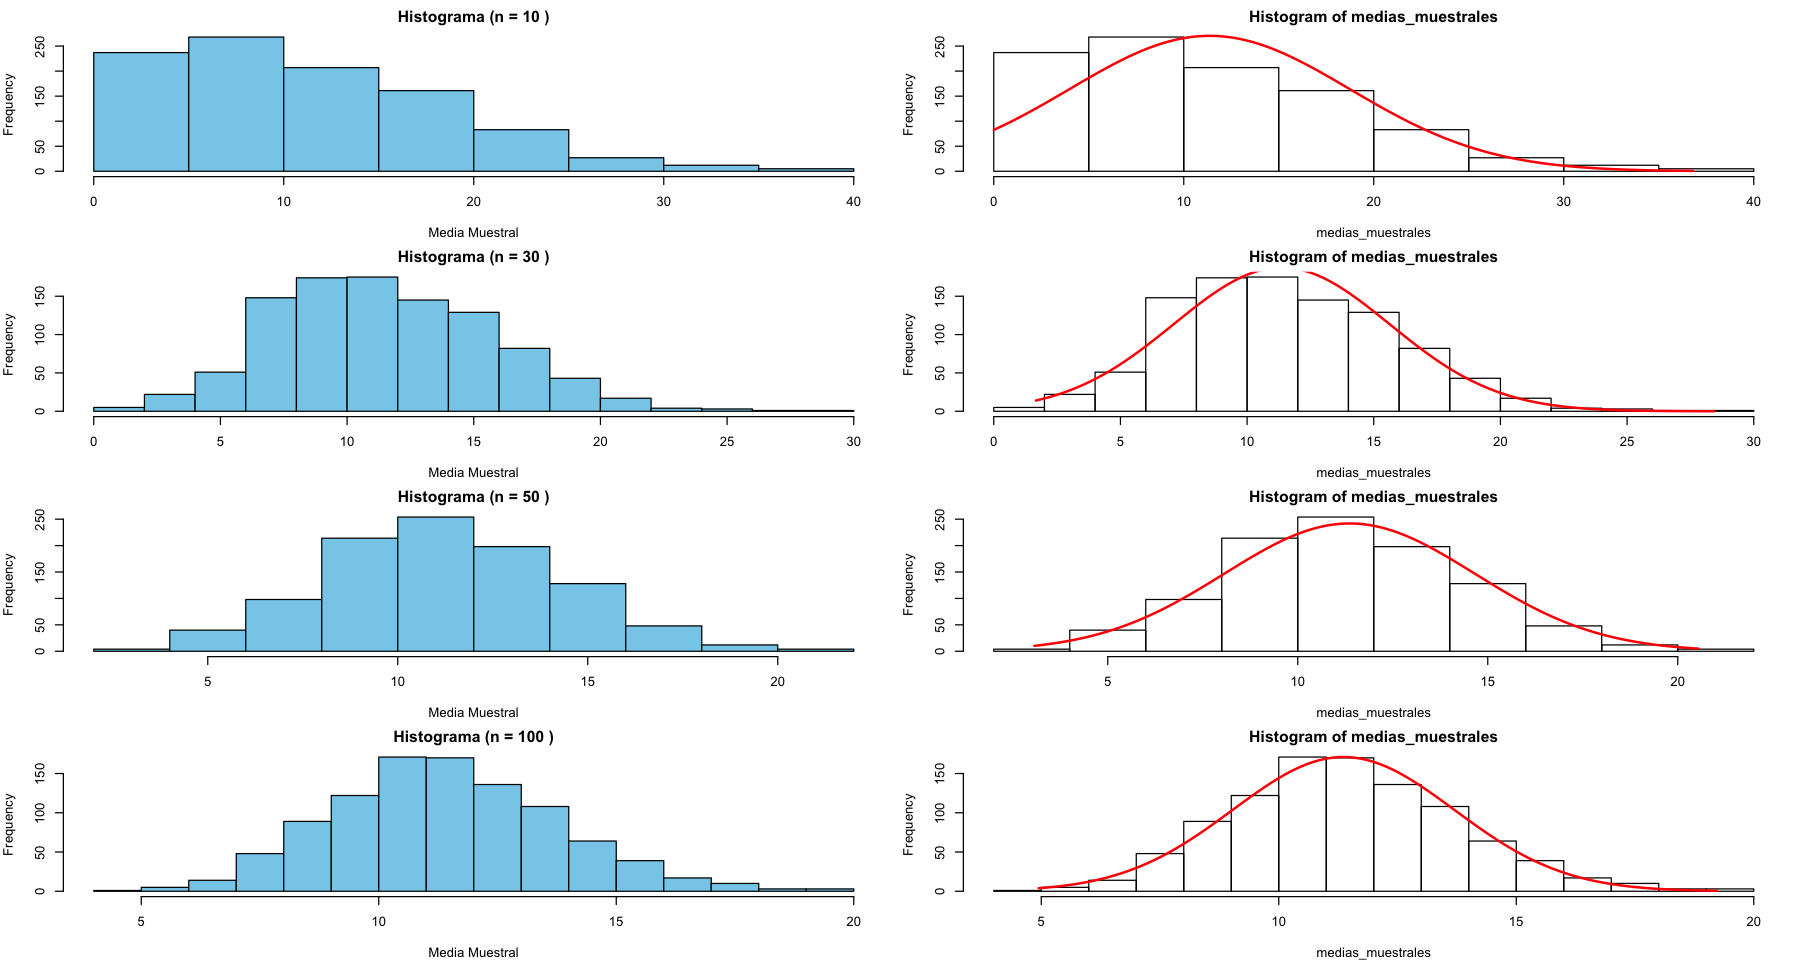

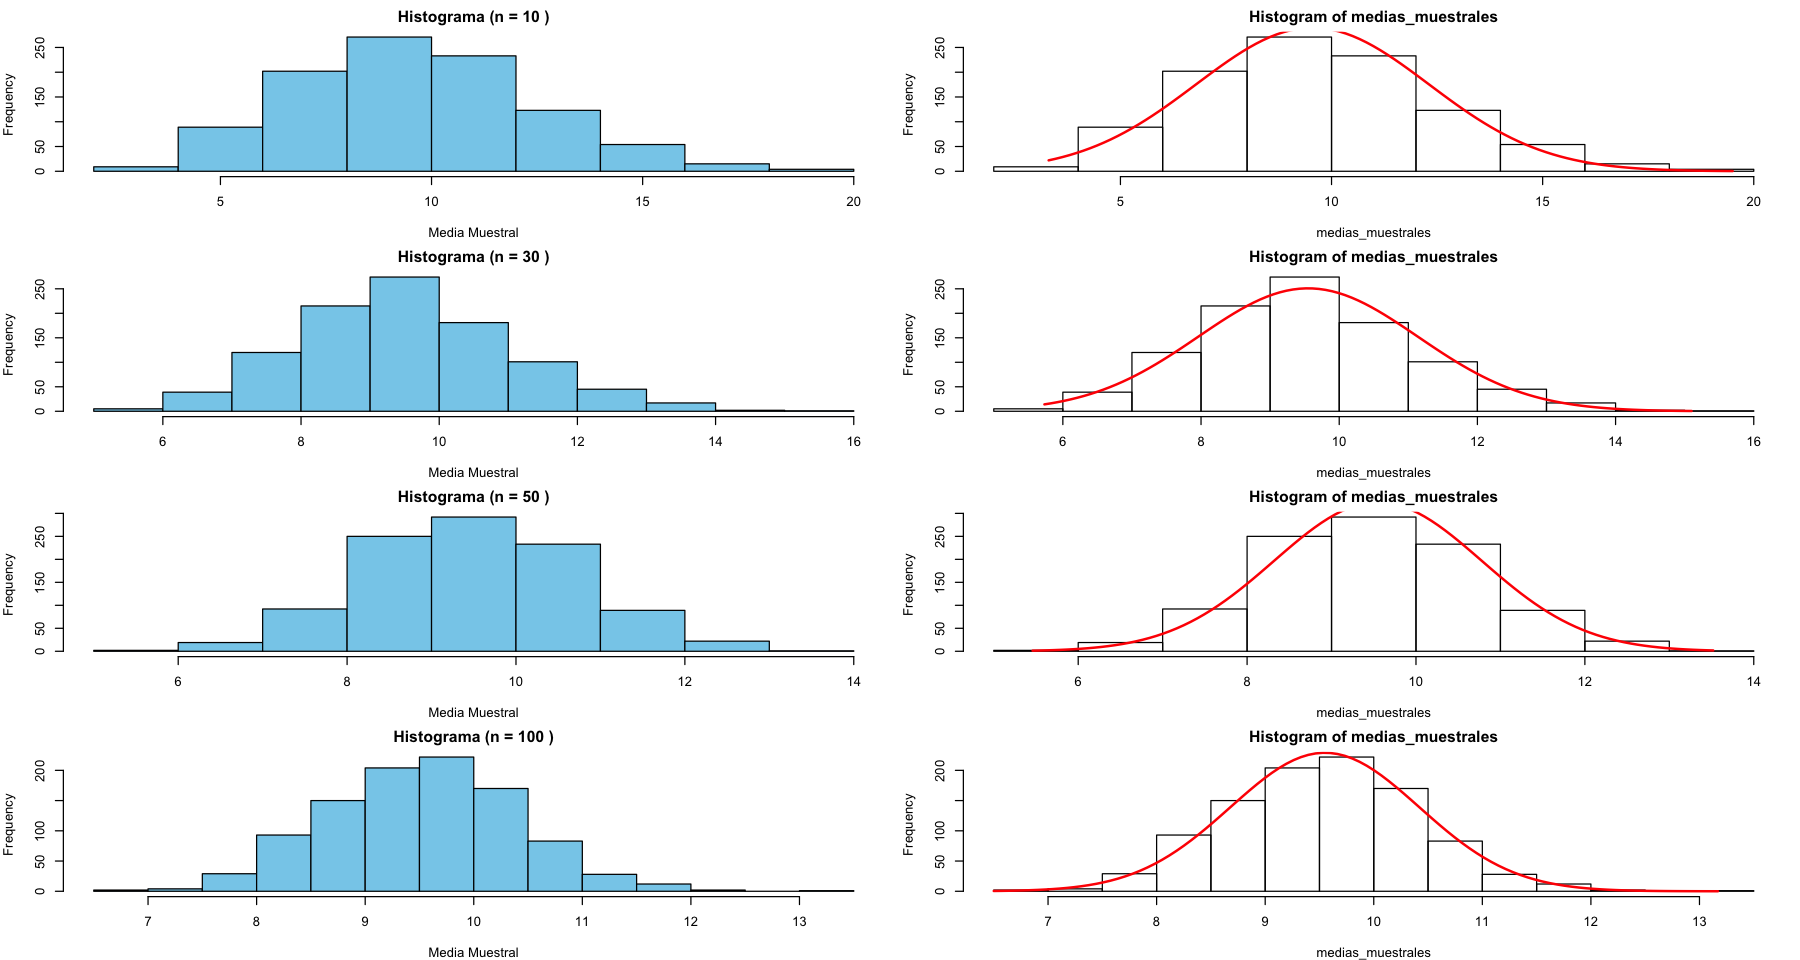

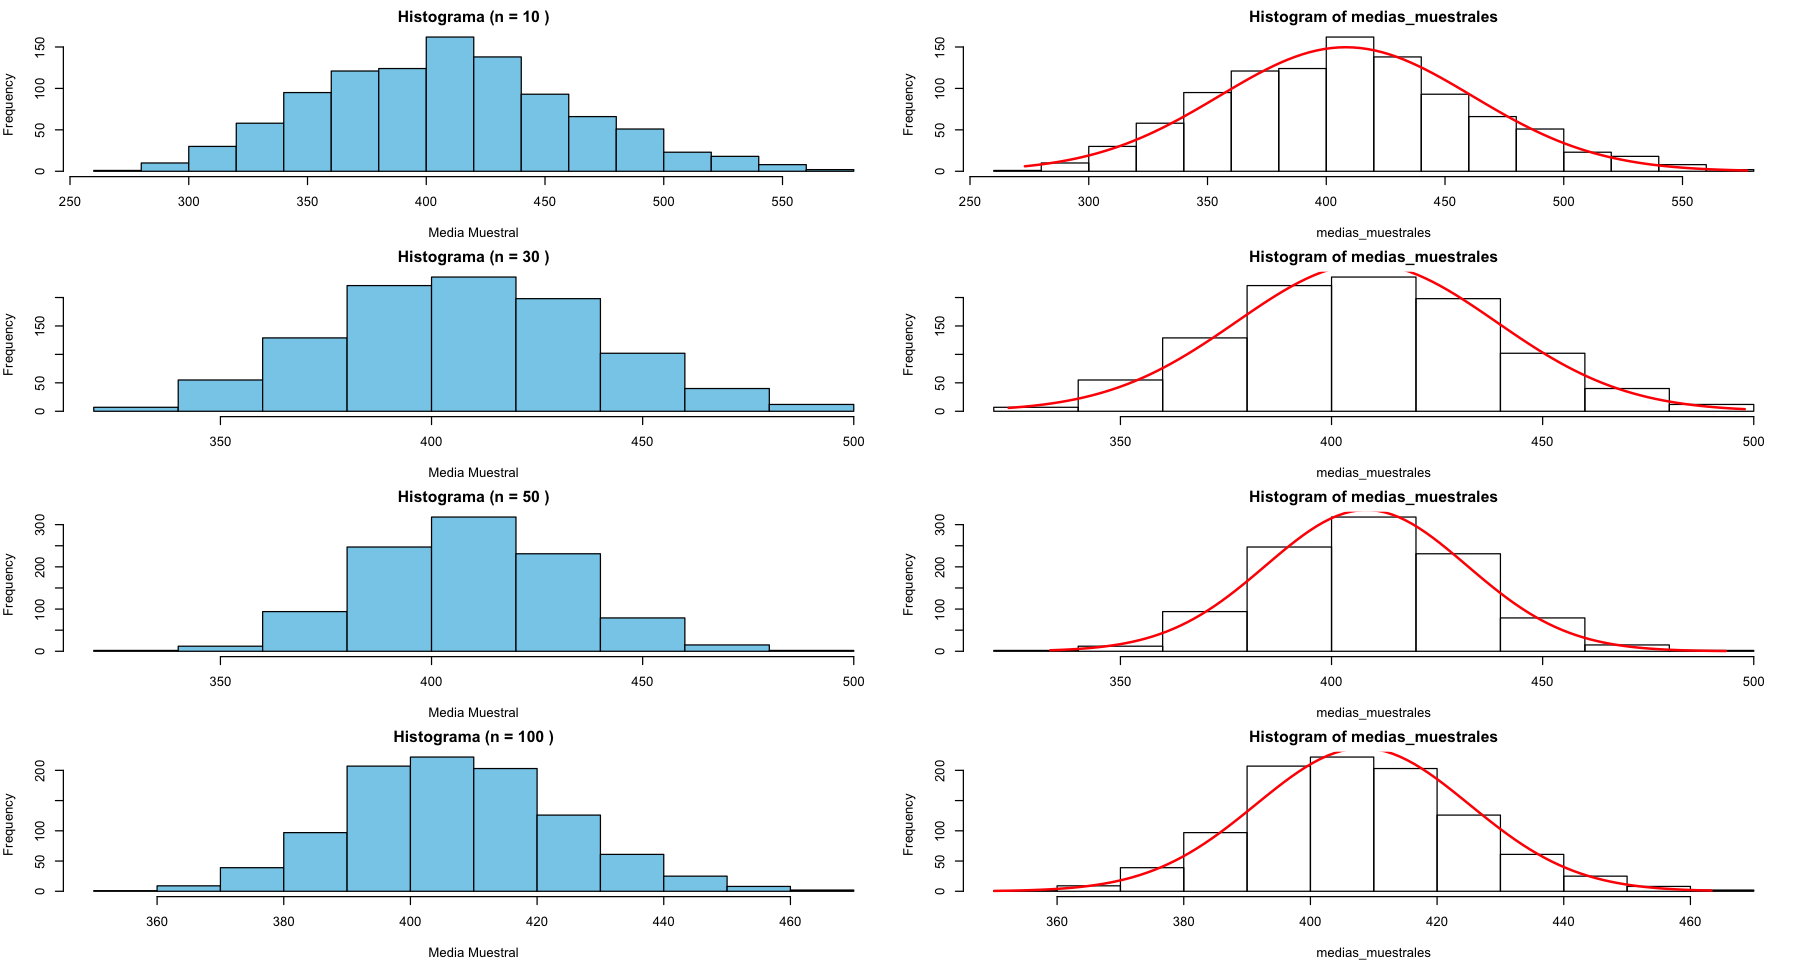

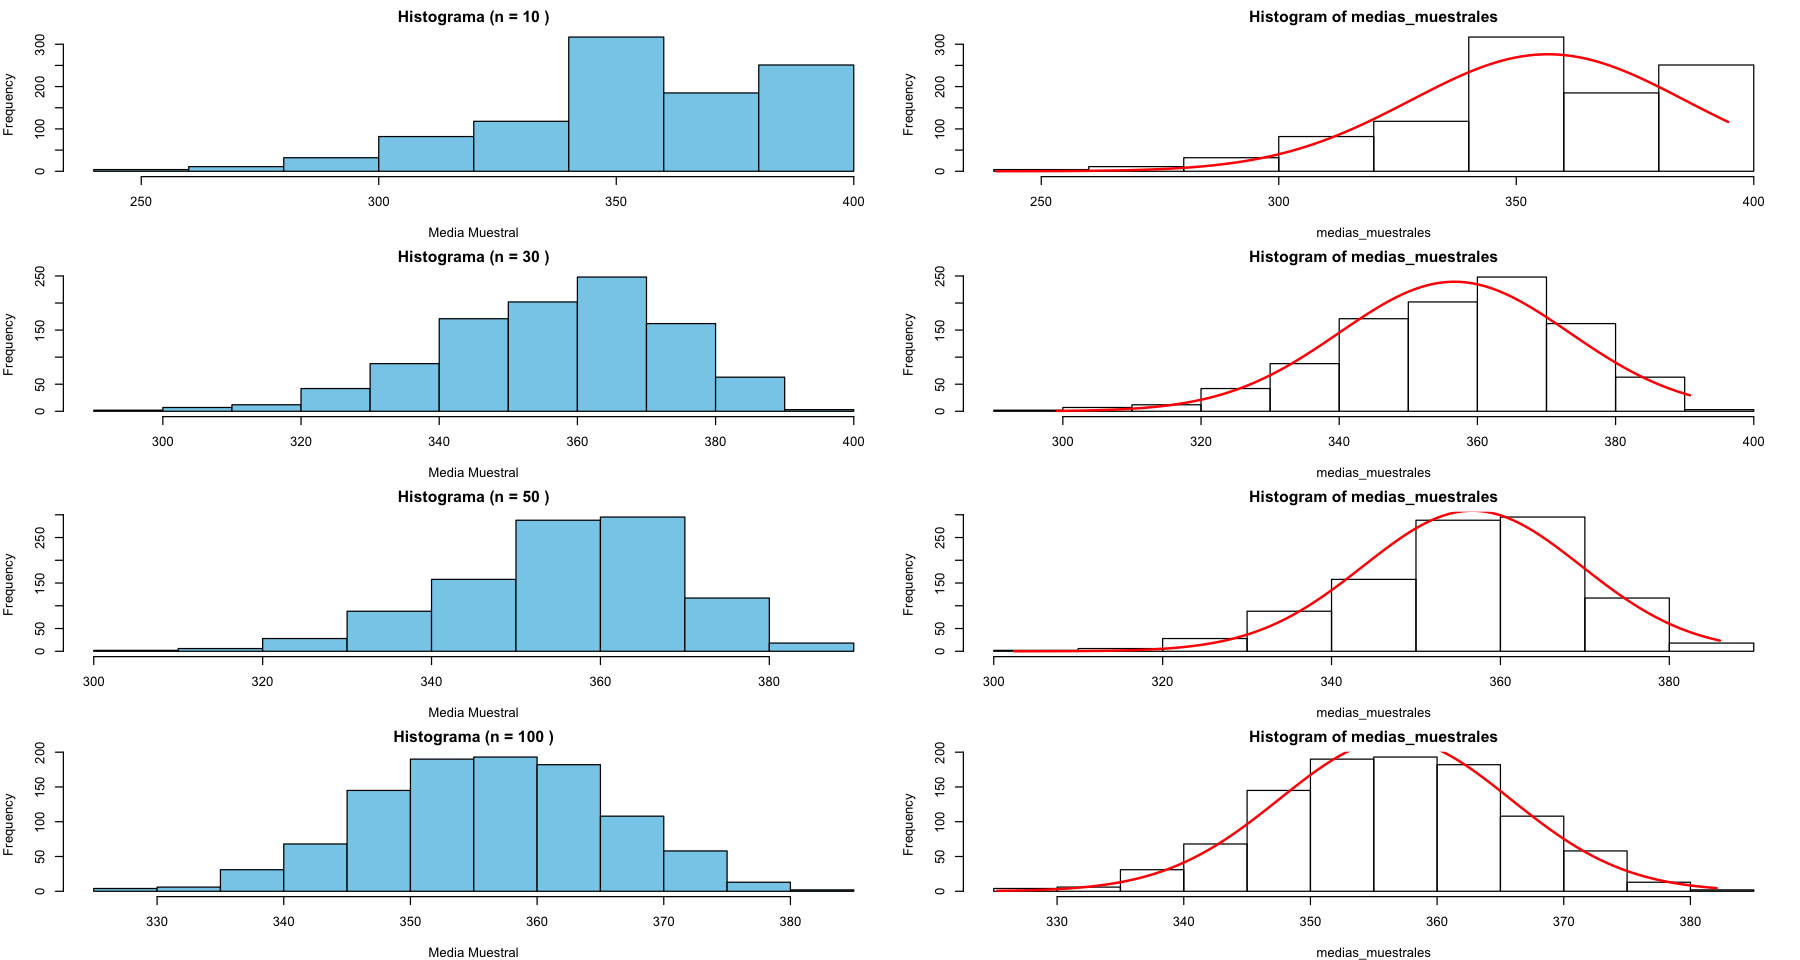

In [138]:
not_norm_df = data.frame(data_boston$crime_index
                            ,data_boston$urban_ratio
                            ,data_boston$highway_index
                            ,data_boston$tax_ratio
                            ,data_boston$racial_index
                            )

num_columns = ncol(not_norm_df)

print(num_rows)

generar_medias_muestrales <- function(tamano_muestra,var) {
  medias_muestrales <- replicate(1000, mean(sample(var, size = tamano_muestra, replace = TRUE)))
  return(medias_muestrales)
}

par(mfrow = c(4, 2), mar = c(4, 4, 2, 1), bg = "white")

tamanos_muestra <- c(10, 30, 50, 100)

for (v in 1:num_columns){
  for (i in 1:length(tamanos_muestra)) {
    medias_muestrales <- generar_medias_muestrales(tamanos_muestra[i],not_norm_df[,v])
    
    hist(medias_muestrales, 
        main = paste("Histograma (n =", tamanos_muestra[i], ")"),
        xlab = "Media Muestral",
        col = "skyblue",
        border = "black")
    
    curva_normal <- dnorm(seq(min(medias_muestrales), max(medias_muestrales), length.out = 100), 
                          mean = mean(not_norm_df[,v]), 
                          sd = sd(not_norm_df[,v]) / sqrt(tamanos_muestra[i]))
    
    lines(seq(min(medias_muestrales), max(medias_muestrales), length.out = 100), 
          curva_normal * length(medias_muestrales) * diff(hist(medias_muestrales)$breaks[1:2]), 
          col = "red", lwd = 2)
  }
}


### <font color='#3d59c6'>  1.3.2 Variables categóricas </font>

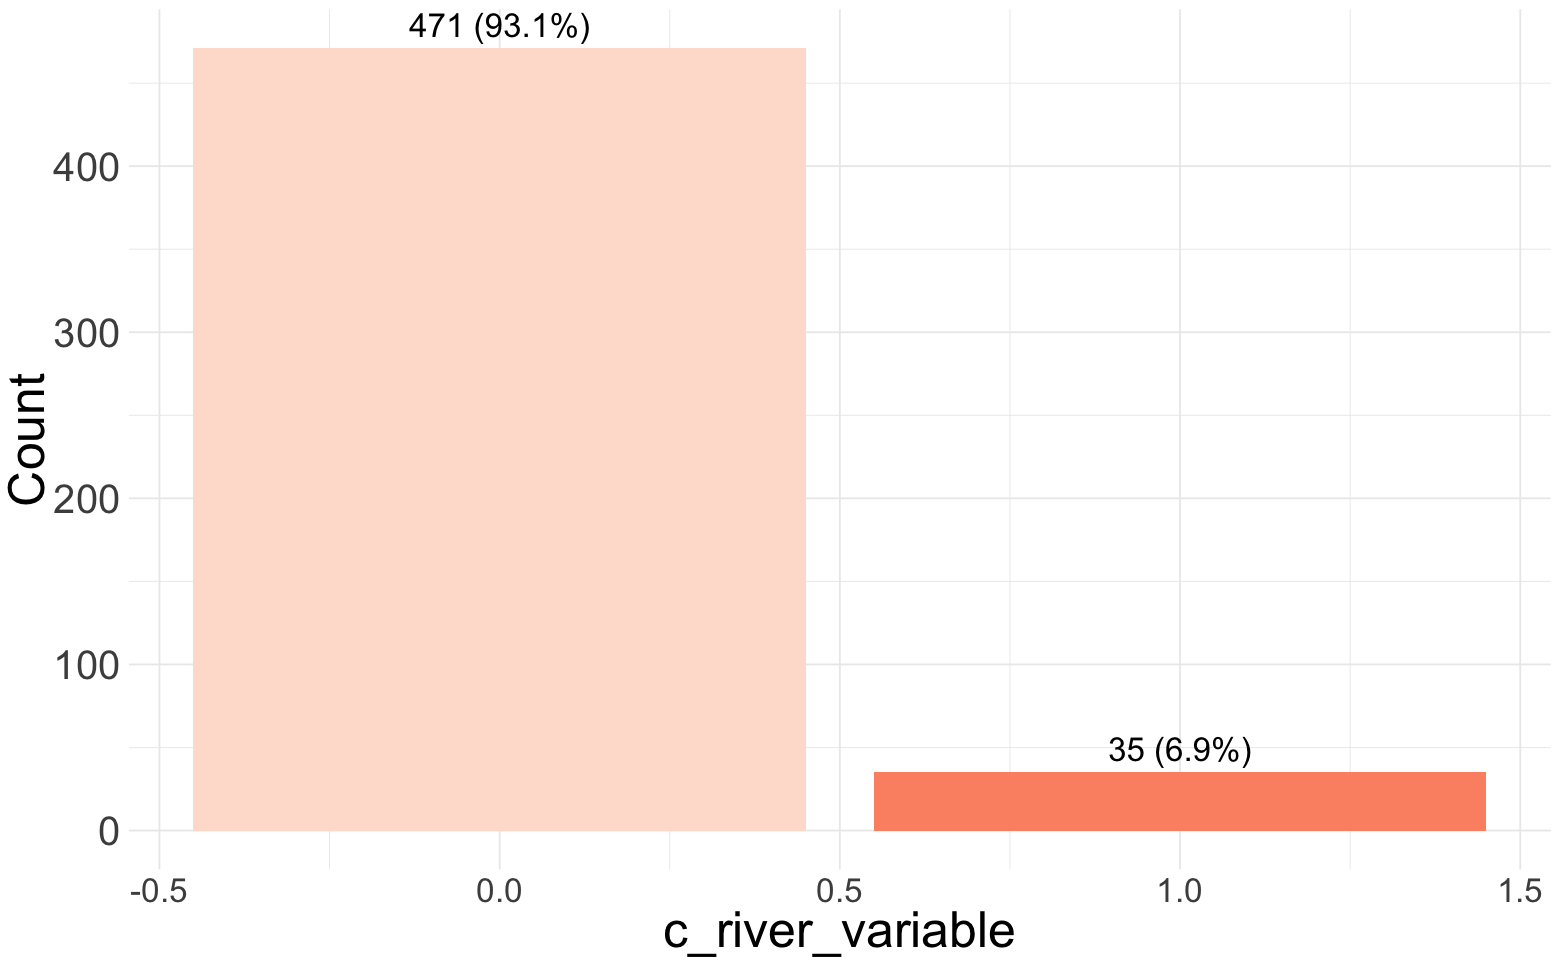

In [139]:

options(
  repr.plot.width = 13,  
  repr.plot.height = 8 
)
bar_plots = list()
var_data_cat_list = data_boston_cat
var_data_cat = lapply(var_data_cat_list, list)

for (variable in names(var_data_cat)) {
  bar_plot = ggplot(data_boston_cat, aes(x = !!sym(variable), fill = as.factor(!!sym(variable)))) +
    geom_bar(stat = 'count', position = 'dodge') +
    scale_fill_brewer(palette = 'Reds') + 
    labs( x = variable, y = 'Count') +
    theme_minimal() +
    theme(legend.position = 'none', text = element_text(size = 30),axis.text.x = element_text(size = 20)) +
    geom_text(
      stat = 'count',
      aes(label = sprintf('%d (%.1f%%)', stat(count), stat(count) / sum(stat(count)) * 100)),
      position = position_dodge(0.9),
    vjust = -0.5,
    size=7
    )
  
  bar_plots[[variable]] = bar_plot
}

grid.arrange(grobs = bar_plots, ncol = 1, widths = rep(1, 1))

Tal y como hemos indicado anteriormente, Boston es una ciudad costera. Este dato nos puede hacer pensar que la presenica de rios va a ser elevada. Los datos dicen lo contrario. 

Como podemos ver, hay una gran presencia de urbanizaciones que no colindan con un río. Esto nos puede indicar que este dataset comprime las urbanizaciones situadas al Sur de Boston, ya que es la zona con menos presencia de ríos. 

Por lo que hace al análisis, el hecho de no tener un número similar de muestras para cada categoría va a condicionar la validación de nuestro test ANOVA.

### <font color='#3d59c6'>  1.3.3 Variable Objetivo </font>

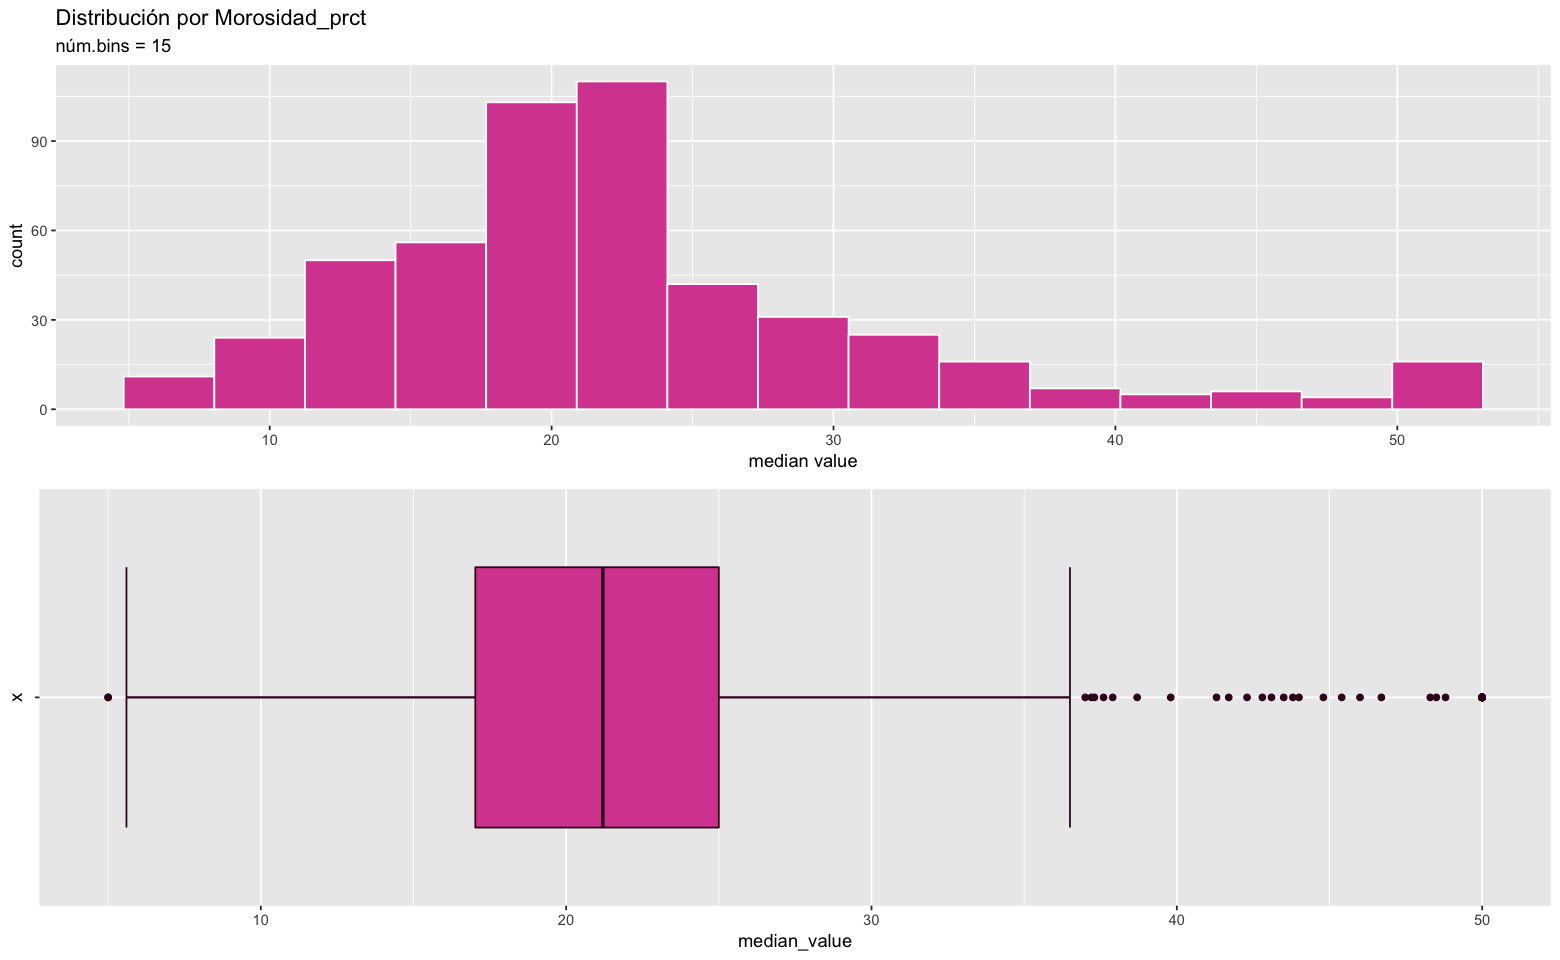

In [140]:
a= ggplot(data_boston) + 
  aes(x = median_value) + 
  geom_histogram(bins = 15 ,fill = "#d94c9f",color = "white") + 
  labs(title="Distribución por Morosidad_prct"  ,subtitle = "núm.bins = 15",x = "median value")  
b= ggplot(data = data_boston, aes(x = "", y = median_value)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip() 
grid.arrange(a,b)

Si nos centramos en la variable objetivo, podemos ver como sigue una distribución normal, con presencia de outliers en la parte superior. Este hecho tiene sentido, ya que la parte Sur de Boston esta equilibrada en cuanto a precio de vivienda, pero la parte que toca con el río Charles es más cara.

Si seguimos con el supuesto que el dataset se centra en la parte Sur de Boston, sumado a la poca presencia de ríos, podemos entonces afirmar que los outliers tienen sentido

## 2. **Análisis de correlación y de componentes principales (3p)**: 
 

In [141]:
round(cov(data_boston_numericas), 3)

,crime_index,urban_ratio,industry_ratio,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
crime_index,60710.864,-1498.577,908.444,16.663,-25.298,2866.530,-1950.006,1646.301,30196.660,175.697,-7386.210,664.800,-730.572
urban_ratio,-1498.577,543.937,-85.413,-1.396,5.113,-373.902,265.051,-63.349,-1236.454,-19.777,373.721,-68.783,77.315
industry_ratio,908.444,-85.413,47.064,0.607,-1.888,124.514,-87.404,35.550,833.360,5.692,-223.580,29.580,-30.521
nox_concentration,16.663,-1.396,0.607,0.013,-0.025,2.386,-1.633,0.617,13.046,0.047,-4.021,0.489,-0.455
rooms_per_dwelling,-25.298,5.113,-1.888,-0.025,0.494,-4.752,2.349,-1.284,-34.583,-0.541,8.215,-3.080,4.493
dwelling_age,2866.530,-373.902,124.514,2.386,-4.752,792.358,-414.579,111.771,2402.690,15.937,-702.940,121.078,-97.589
dwelling_dist,-1950.006,265.051,-87.404,-1.633,2.349,-414.579,524.974,-75.364,-1579.032,-6.814,470.191,-69.830,37.530
highway_index,1646.301,-63.349,35.550,0.617,-1.284,111.771,-75.364,75.816,1335.757,8.761,-353.276,30.385,-30.561
tax_ratio,30196.660,-1236.454,833.360,13.046,-34.583,2402.690,-1579.032,1335.757,28404.759,168.153,-6797.911,654.715,-726.256
teacher_ratio,175.697,-19.777,5.692,0.047,-0.541,15.937,-6.814,8.761,168.153,4.687,-35.060,5.783,-10.111


Debido a la gran diferencia en unidades de medida de cada variable, dicha matriz de covarianza no nos ayuda a observar si existe alguna relación entre variables

In [142]:
round(cor(data_boston_numericas), 3)

,crime_index,urban_ratio,industry_ratio,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
crime_index,1.000,-0.261,0.537,0.584,-0.146,0.413,-0.345,0.767,0.727,0.329,-0.328,0.378,-0.322
urban_ratio,-0.261,1.000,-0.534,-0.517,0.312,-0.570,0.496,-0.312,-0.315,-0.392,0.176,-0.413,0.360
industry_ratio,0.537,-0.534,1.000,0.764,-0.392,0.645,-0.556,0.595,0.721,0.383,-0.357,0.604,-0.484
nox_concentration,0.584,-0.517,0.764,1.000,-0.302,0.731,-0.615,0.611,0.668,0.189,-0.380,0.591,-0.427
rooms_per_dwelling,-0.146,0.312,-0.392,-0.302,1.000,-0.240,0.146,-0.210,-0.292,-0.356,0.128,-0.614,0.695
dwelling_age,0.413,-0.570,0.645,0.731,-0.240,1.000,-0.643,0.456,0.506,0.262,-0.274,0.602,-0.377
dwelling_dist,-0.345,0.496,-0.556,-0.615,0.146,-0.643,1.000,-0.378,-0.409,-0.137,0.225,-0.427,0.178
highway_index,0.767,-0.312,0.595,0.611,-0.210,0.456,-0.378,1.000,0.910,0.465,-0.444,0.489,-0.382
tax_ratio,0.727,-0.315,0.721,0.668,-0.292,0.506,-0.409,0.910,1.000,0.461,-0.442,0.544,-0.469
teacher_ratio,0.329,-0.392,0.383,0.189,-0.356,0.262,-0.137,0.465,0.461,1.000,-0.177,0.374,-0.508


Sin embargo, con la matriz de correlación podemos ver con mayor facilidad si hay alguna variable muy relacionada con otra. Para el caso que nos ocupa, vemos como las correlaciones son, en general, bajas. Aún así, destacar el 0.910 entre **highway_index y tax_ratio**.

Este hecho se puede dar porque áreas con una mayor accesibilidad a autopistas a menudo son consideradas más convenientes y pueden experimentar un mayor desarrollo urbano. Esto puede llevar a una mayor demanda de propiedades en esas áreas, lo que a su vez podría influir en los valores fiscales y en el caso que nos ocupa, el índice de tasas.

De hecho, la accesibilidad a autopistas también puede estar relacionada con la calidad de vida percibida en una zona. Si las áreas con mejor acceso a autopistas ofrecen comodidades y servicios mejorados, esto puede influir tanto en los precios de la vivienda como en las tasas fiscales.

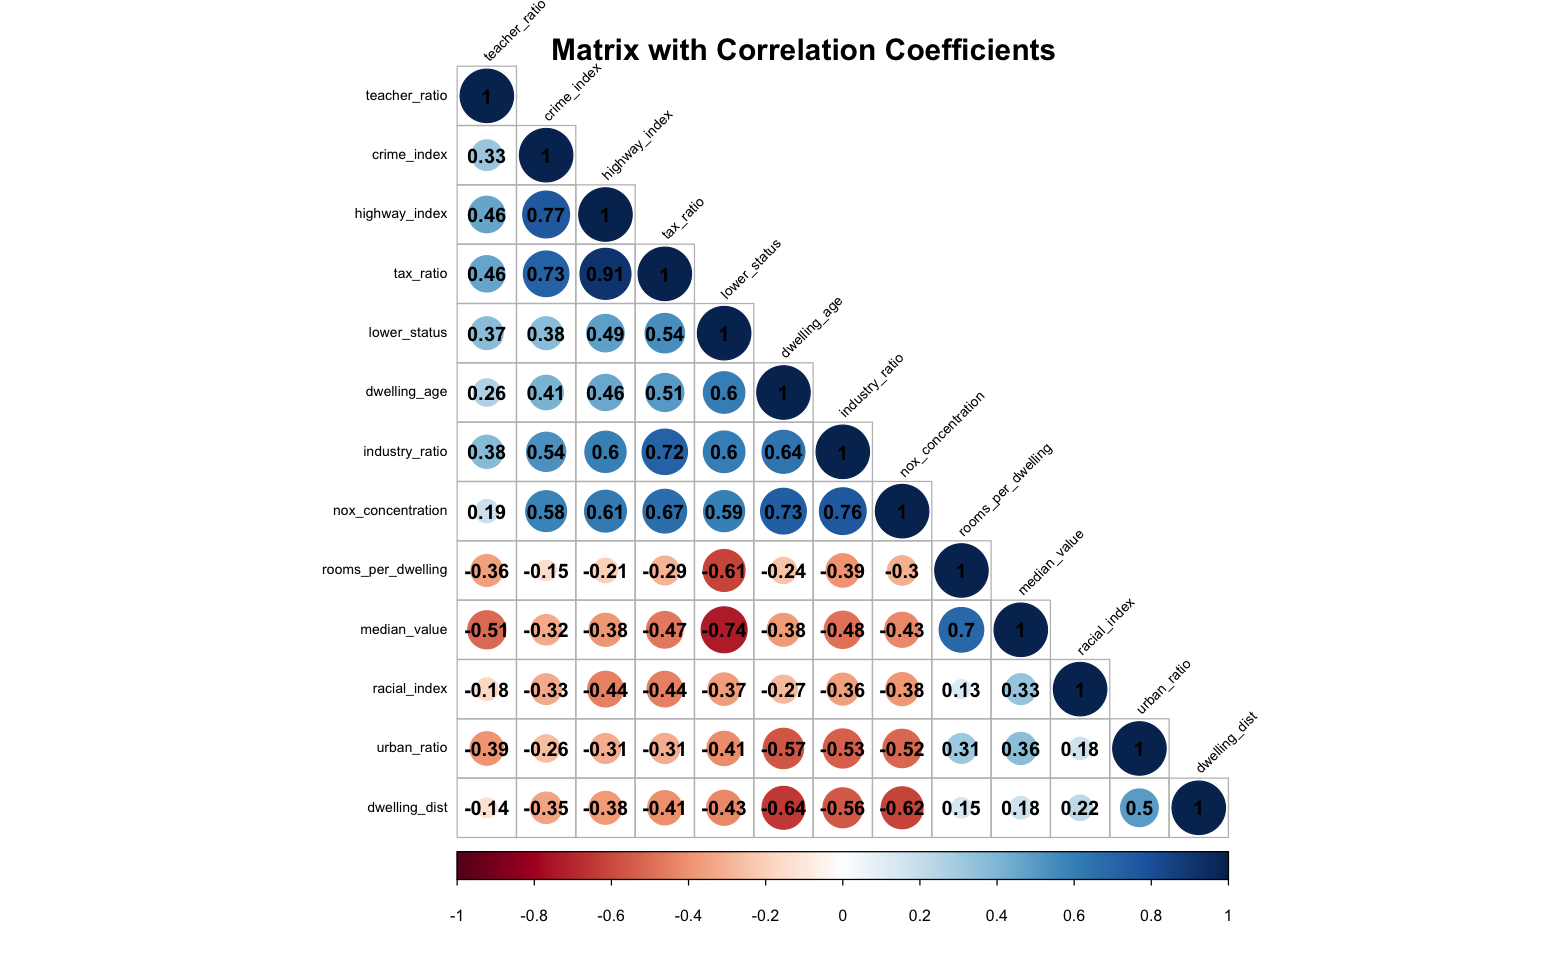

In [143]:

par(bg = "white")

# Correlation matrix using corrplot
cor_matrix <- cor(data_boston_numericas)

# Customize corrplot appearance
corrplot(cor_matrix,
         method = "circle",
         type = "lower",
         order = "hclust",
         tl.col = "black",
         tl.srt = 45,
         addCoef.col = "black",
         number.cex = 1,
         tl.cex = 0.7)

# Add a title
title("Matrix with Correlation Coefficients", cex.main = 1.5)



Para ver la matriz de correlaciones de manera más gráfica, hemos empleado un **corrplot()**. No se ha usado la función pairs(), ya que la infromación visual que esta da no es clara (debido a la gran cantidad de variables).

Como hemos mencionado, las correlaciones son, en general, estandar, rondando los 0.60 en general. Aún así, destacar nuevamente el 0.9 y además, el 0.77 de crime_index con highway_index. Por lo que se ve, a los criminales en Boston les gusta huir por la autopista ;)

Dicho esto, vamos a empezar con la PCA. Para ello, vamos a crear un dataframe nuevo, excluiendo variables que creemos prescindibles. Empezando por tax_ratio, esta se ha eliminado ya que highway_index explica esta bariable un 90%. de esta manera, nos ahorramos una variable para nuestro análisis de componentes (menos es mas). La variable categórica también la hemos eliminado, debido a la descompensación de datos por categoría (en el test ANOVA vamos a dar otras razones adicionales). 

In [144]:
data_boston_cor = data.frame(data_boston$teacher_ratio
                            ,data_boston$crime_index
                            ,data_boston$highway_index
                            ,data_boston$lower_status
                            ,data_boston$dwelling_age
                            ,data_boston$nox_concentration
                            ,data_boston$rooms_per_dwelling
                            ,data_boston$racial_index
                            ,data_boston$urban_ratio
                            ,data_boston$dwelling_dist
                            )

acp = princomp(data_boston_cor,cor=TRUE)
summary(acp)
print('desviación estandard componente 1:')
sd(predict(acp)[,1:1])
print('varianza componente 1:')
var(predict(acp)[,1:1])

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     2.1569907 1.1079136 1.0879752 0.91786893 0.82181989
Proportion of Variance 0.4652609 0.1227472 0.1183690 0.08424834 0.06753879
Cumulative Proportion  0.4652609 0.5880081 0.7063771 0.79062547 0.85816426
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.64908778 0.61027197 0.48603844 0.46287377 0.41728297
Proportion of Variance 0.04213149 0.03724319 0.02362334 0.02142521 0.01741251
Cumulative Proportion  0.90029576 0.93753894 0.96116228 0.98258749 1.00000000

[1] "desviación estandard componente 1:"


[1] 2.159125

[1] "varianza componente 1:"


[1] 4.661822

In [145]:
loadings(acp)


Loadings:
                               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7
data_boston.teacher_ratio       0.235  0.371  0.401  0.519  0.317  0.381       
data_boston.crime_index         0.319 -0.335  0.351  0.193 -0.372 -0.243 -0.117
data_boston.highway_index       0.357 -0.239  0.398  0.134 -0.144              
data_boston.lower_status        0.361  0.300        -0.341 -0.158  0.275  0.259
data_boston.dwelling_age        0.370        -0.349                0.221  0.561
data_boston.nox_concentration   0.394 -0.187 -0.175 -0.113 -0.185 -0.229  0.148
data_boston.rooms_per_dwelling -0.220 -0.660         0.308  0.281  0.210  0.330
data_boston.racial_index       -0.230  0.230 -0.303  0.571 -0.662              
data_boston.urban_ratio        -0.305 -0.200  0.322 -0.349 -0.403  0.613       
data_boston.dwelling_dist      -0.314  0.185  0.451               -0.442  0.679
                               Comp.8 Comp.9 Comp.10
data_boston.teacher_ratio       0.252         0.255 
dat

De este análisis, podemos ver como la **Componente 1** explica un **46.5%** de la varianza, con **nox_concentration** y **dwelling_age** como variables que mejor representan esta componente.

La componente 2, explica un **12.2%** de la varianza, teniendo **rooms_per_dwelling** como variable a destacar.

Para decidir cuantas componentes vamos a escojer, junto con qué variables, vamos a ver gráficamente los resultados de la PCA:

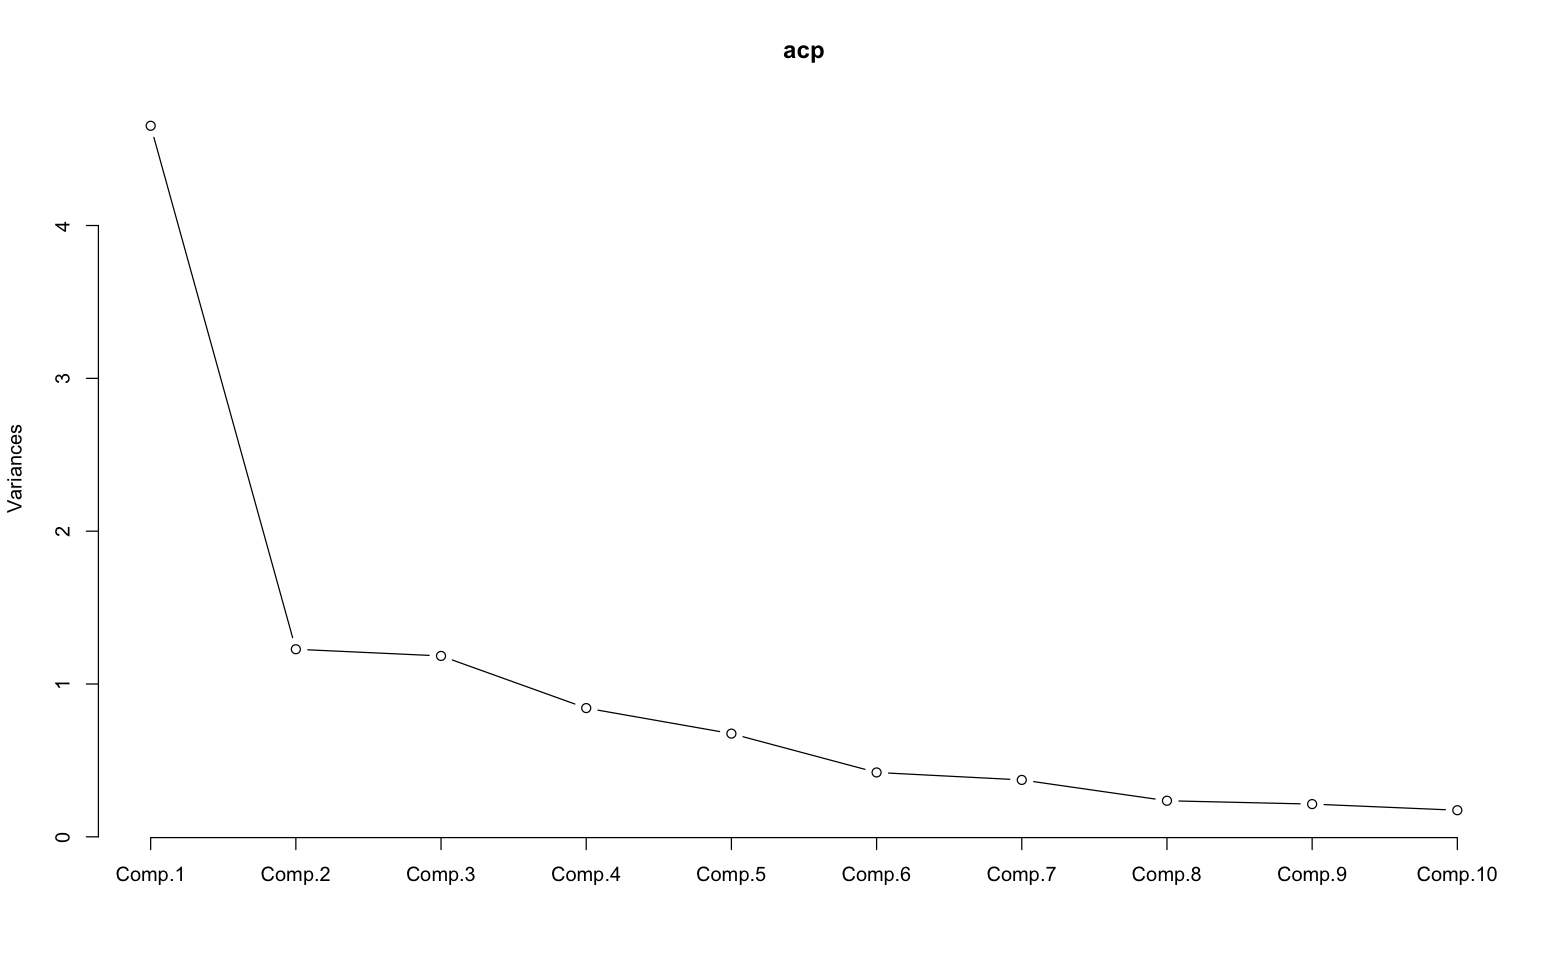

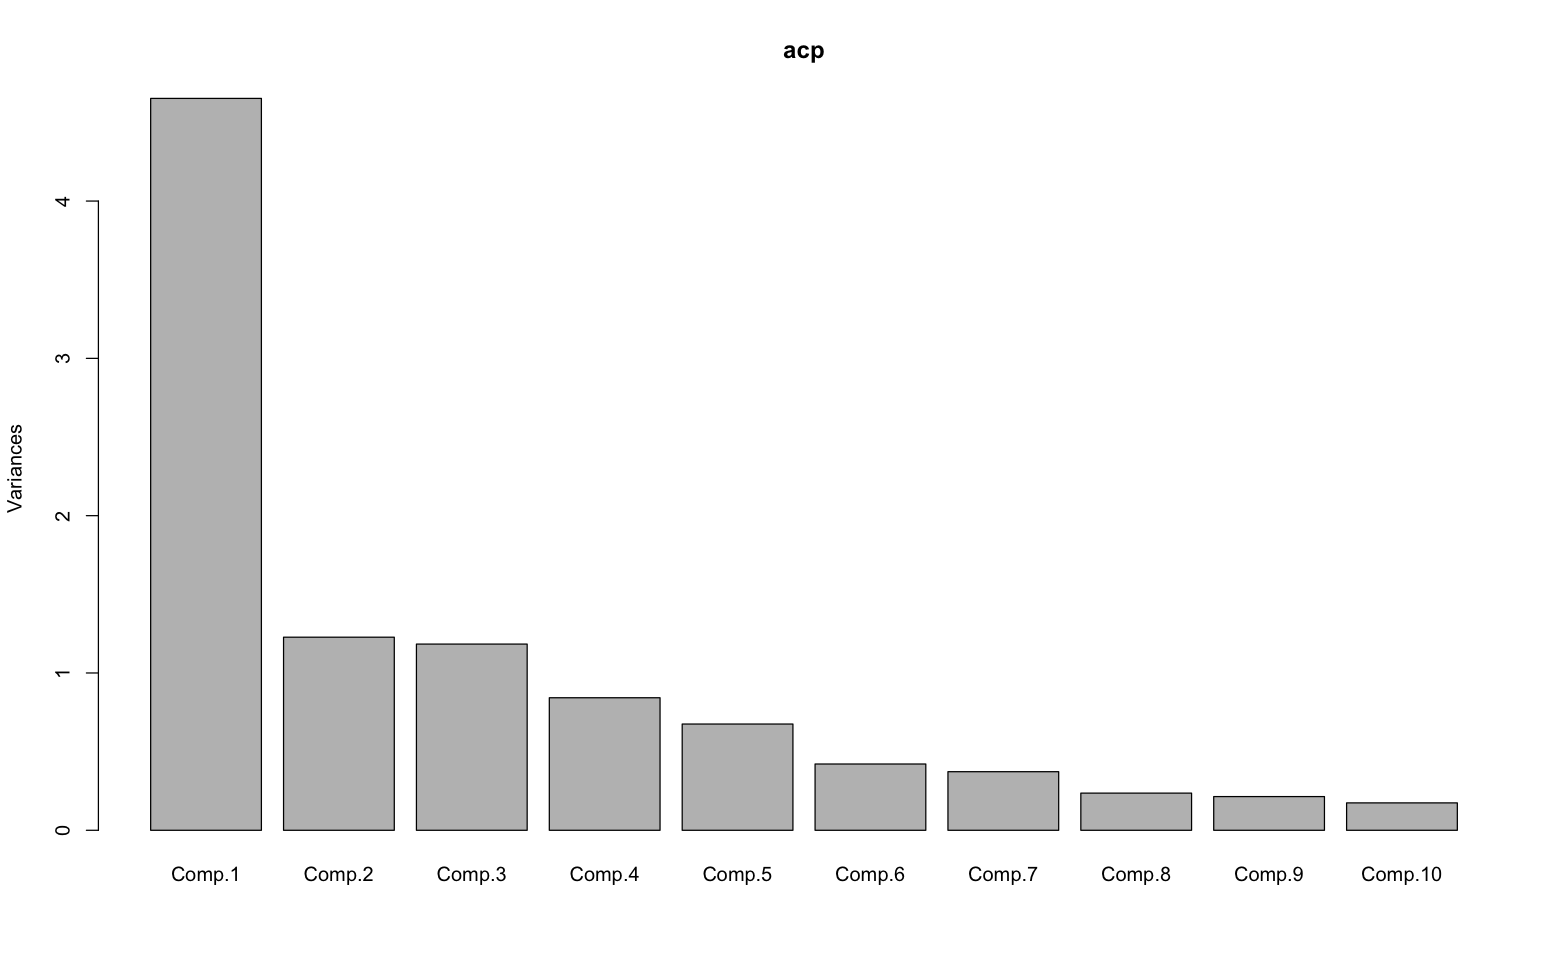

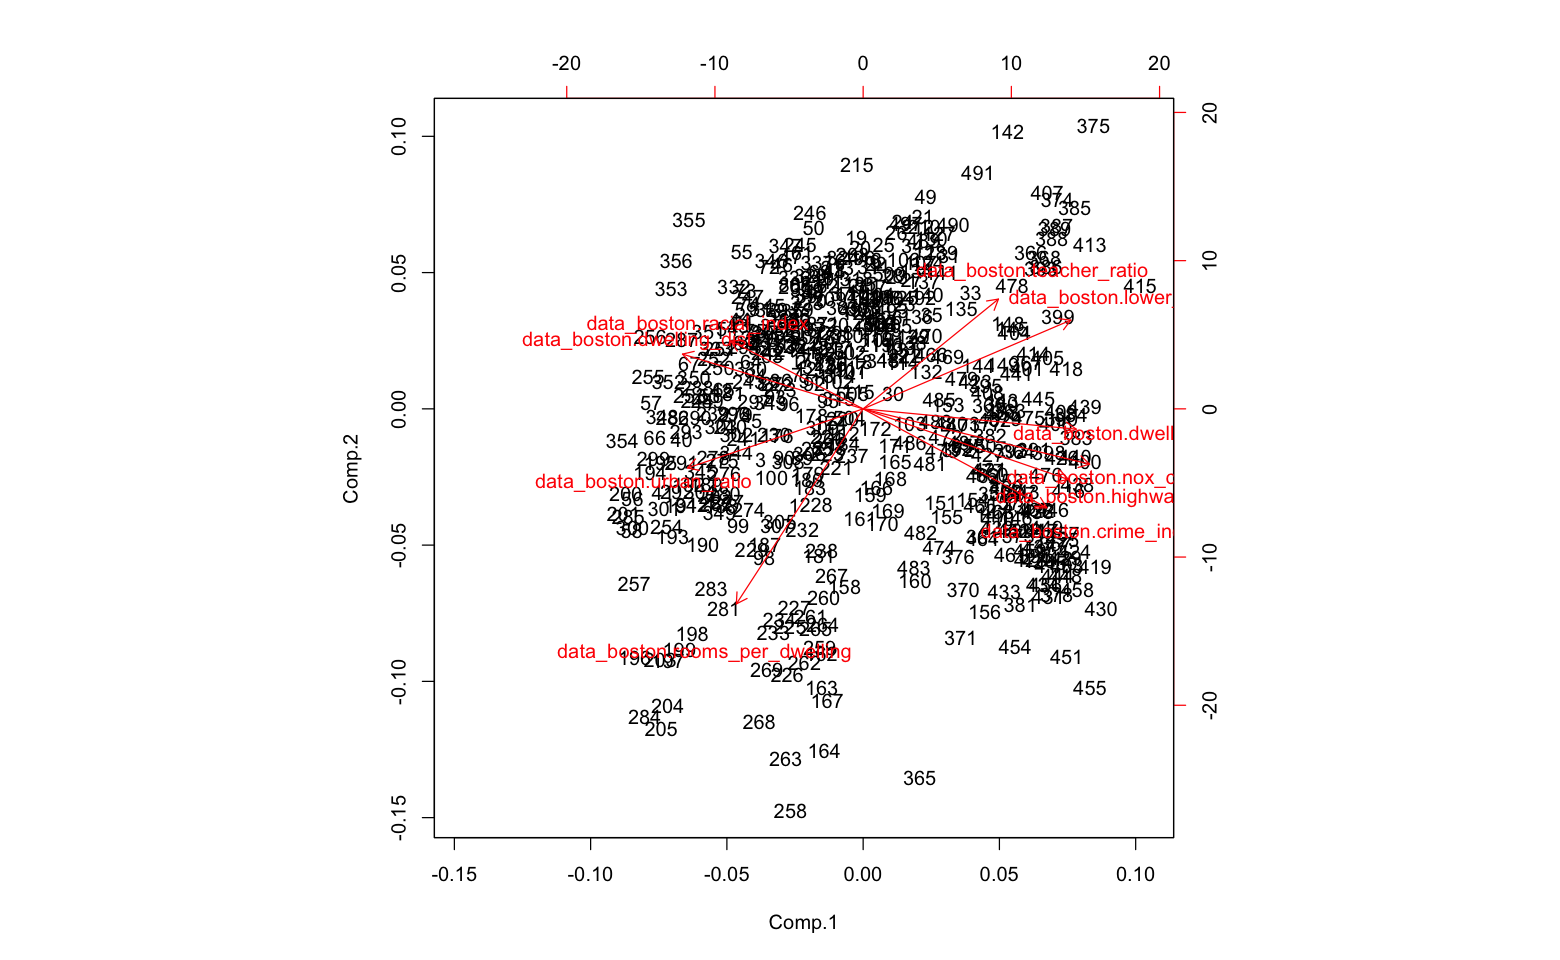

In [146]:
par(bg = "white")
plot(acp, type="lines")
plot(acp)
biplot(acp)

Podemos ver como con 2-3 componentes podemos explicar la gran mayoria de la varianza. Por lo que concierne a las variables, hemos de tener en cuenta que estas no esten paralelas en el biplot(), y que la flecha sea lo mas larga posible.

In [147]:
mcomponentes = cor(data_boston_cor,predict(acp)[,1:2])
mcomponentes
apply(mcomponentes*mcomponentes,1,sum)

,Comp.1,Comp.2
data_boston.teacher_ratio,0.5072289,0.41152318
data_boston.crime_index,0.6885940,-0.37076145
data_boston.highway_index,0.7691835,-0.26488626
data_boston.lower_status,0.7783860,0.33267869
data_boston.dwelling_age,0.7989360,-0.07615362
data_boston.nox_concentration,0.8490857,-0.20743380
data_boston.rooms_per_dwelling,-0.4754049,-0.73138577
data_boston.racial_index,-0.4962941,0.25452114
data_boston.urban_ratio,-0.6583426,-0.22170182
data_boston.dwelling_dist,-0.6772443,0.20525896


data_boston.teacher_ratio        data_boston.crime_index 
                     0.4266325                      0.6116258 
     data_boston.highway_index       data_boston.lower_status 
                     0.6618080                      0.7165599 
      data_boston.dwelling_age  data_boston.nox_concentration 
                     0.6440981                      0.7639754 
data_boston.rooms_per_dwelling       data_boston.racial_index 
                     0.7609349                      0.3110889 
       data_boston.urban_ratio      data_boston.dwelling_dist 
                     0.4825667                      0.5007911

## 3. **Análisis de ANOVA (2p)**


Antes de concluir con qué variables nos quedamos, vamos a examinar la variable categórica que tenemos (c_river_variable). De nuevo, destacar que no tenemos datos compensados para cada categoria, lo qeu condiciona las consideraciones de los resultados obtenidos. 93% no tiene río y un 7% sí.

Para este análisis, hemos decidido hacer un **One-Way ANOVA**, ya que queremos estudiar el efecto de un solo factor (c_river_variable) en una variable dependiente continua (median_value).

Antes, vamos a comprovar los supuestos:

### COMPROVACIÓN DE SUPUESTOS: Normalidad

In [148]:
#Normalidad
variables = c('median_value')
categorias = c(0,1)
resultados <- data.frame(Variable = character(), Cat = character(), Shapiro = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  for (cat in categorias) {
    data_subset = subset(data_boston, c_river_variable == cat)
    result = shapiro.test(data_subset[, variable])
    resultados = rbind(resultados, data.frame(Variable = variable, Cat = cat, Shapiro = result$statistic, PValor = round(result$p.value, 3)))
  }
}

print(resultados)


       Variable Cat   Shapiro PValor
W  median_value   0 0.9282612      0
W1 median_value   1 0.8359233      0


Podemos ver como el p-value tiene un **valor superior a 0.05**, lo que indica aceptar la hipótesis nula (**no** siguen una distribución normal)

### COMPROVACIÓN DE SUPUESTOS: Homocedasticidad

In [149]:
#Homocedasticidad
variables = c('median_value')
resultados_bartlett = data.frame(Variable = character(), Estadistico = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  resultado_bartlett = bartlett.test(get(variable) ~ c_river_variable, data = data_boston)
  resultados_bartlett = rbind(resultados_bartlett, data.frame(Variable = variable, Estadistico = resultado_bartlett$statistic, PValor = resultado_bartlett$p.value))
}

print(resultados_bartlett)

                         Variable Estadistico     PValor
Bartlett's K-squared median_value    6.315541 0.01196842


El p-value es mas grande que 0.05, por lo que aceptamos al hipótesis nula (los errores tienen una varianza constante)

### <font color='#3d59c6'>  3.1 One-Way ANOVA </font>

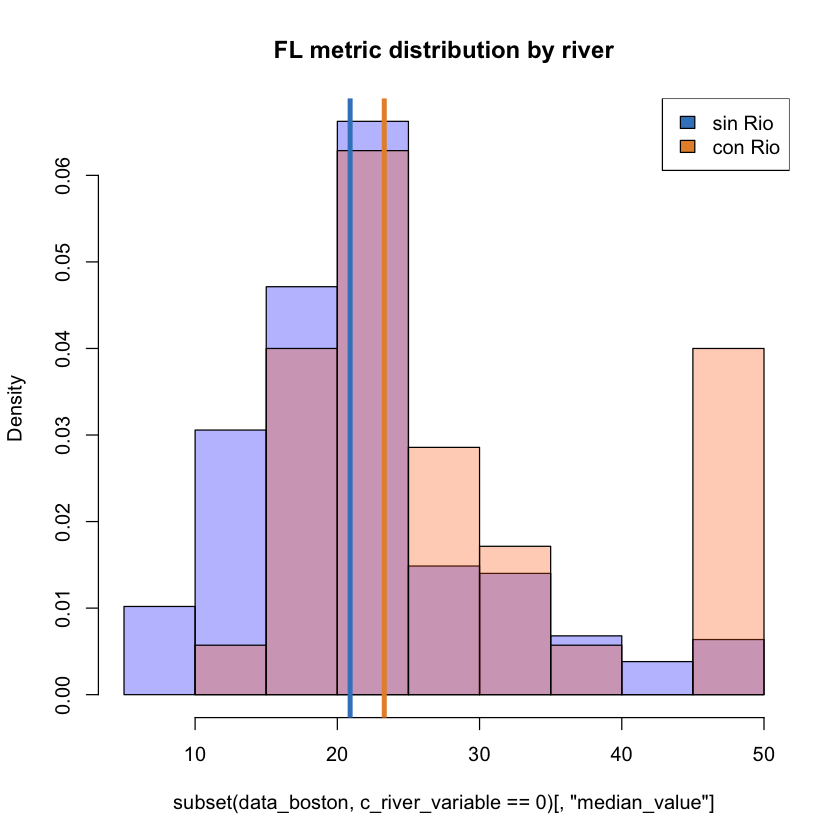

In [150]:
par(bg = "white")
options(
  repr.plot.width = 7,  
  repr.plot.height = 7  
)
# Probabilistic hystogram with the 'FL' distribution by species 
hist(subset(data_boston,c_river_variable==0)[,'median_value'],
    col = rgb(0,0,1,0.3),
    main = 'FL metric distribution by river',
    freq = F)
hist(subset(data_boston,c_river_variable==1)[,'median_value'],
    col = rgb(1,0.4,0,0.3),
    add = T,
    freq = F)

# Mediana 'FL' x species
abline(v = median(subset(data_boston, c_river_variable==0)[,'median_value']), col = '#3d85c6', lwd = 4)
abline(v = median(subset(data_boston,c_river_variable==1)[,'median_value']), col = '#e69138', lwd = 4)
legend(x = "topright", legend = c('sin Rio', 'con Rio'), fill = c('#3d85c6', '#e69138'))


Aunque este gráfico nos puede dar una idea de que hay significancia estadística entre clases, vamos a explorar esta idea.

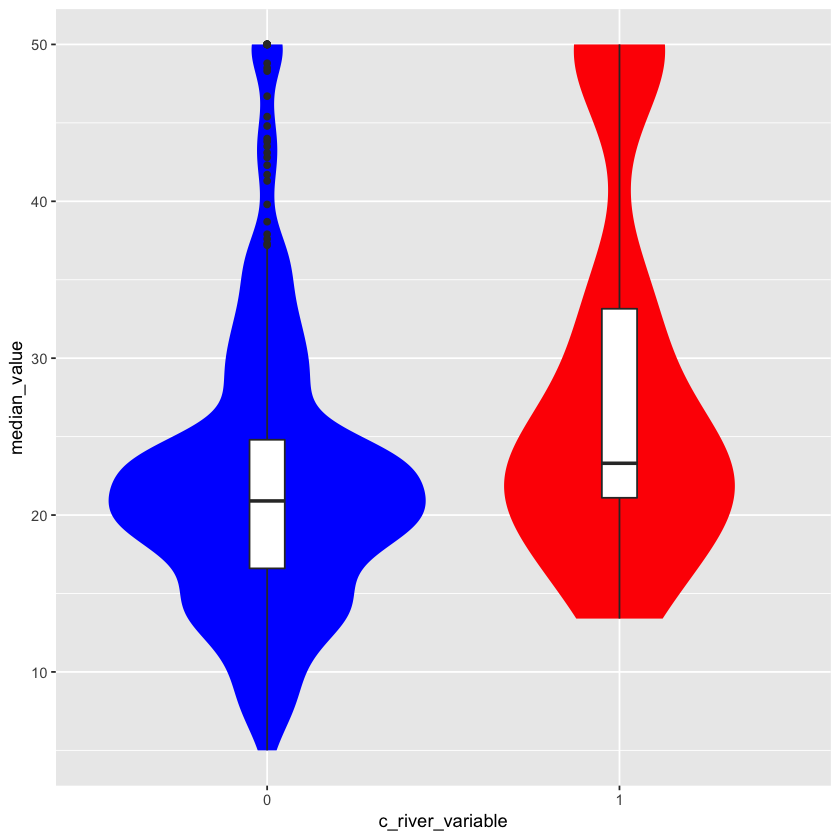

In [151]:
data_boston$c_river_variable <- factor(data_boston$c_river_variable)

ggplot(data_boston, aes(c_river_variable, median_value)) +
  geom_violin(color = NA,aes(fill = factor(c_river_variable))) +
  theme(legend.position = 'none') +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c('0' = '#0000FF', '1' = '#FF0000'))

Con los gráficos de violín, podriamos llegar a afirmar que hay diferencia significativa, aunque las medianas estan bastante cerca, los datos se distribuyen diferente.

Vamos a ver qué nos dice el test como tal

In [152]:
anova = aov(median_value ~ c_river_variable, data = data_boston)
summary(anova)

                  Df Sum Sq Mean Sq F value   Pr(>F)    
c_river_variable   1   1312  1312.1   15.97 7.39e-05 ***
Residuals        504  41404    82.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Podemos ver como el **p-value es inferior a 0.05**, por lo que rechazamos la hipótesis nula y efectivamente hay diferencia significativa entre clases

## 4. **Desarrollo y justificación de las variables (1p)**: 

- **Conclusiones punto 1:**

Para este punto, simplemente recalcar que hay variables que no siguen una distribución normal. Cierto es que la normalidad se comprueba para los residuos (las diferencias entre los valores observados y los valores predichos por el modelo), así que no nos deberia preocupar en exceso. Simplemente, tener en cuenta que, si los siguientes puntos lo permiten, mejor escoger variables que sigan una distribución normal.

Del primer punto también extraemos que la variable categórica c_river_variable, a pesar de lo que diga el test ANOVA, no la deberiamos usar como variable explicativa, ya que existe una descompensación de datos entre clases.

- **Conclusiones punto 2:**

Para el segundo punto, hemos observado que las correlaciones entre variables són bastante estándar, destacando un par de ellas. Por lo que concierne a la PCA, podemos concluir que con 2 Componentes podemos explicar gran parte de la varianza (**58.7%**). Debo comentar que se ha probado teniendo en cuenta 3 componentes (por ende, 3 variables -> la más representativa por Componente) pero el resultado del modelo no parece mejorar significativamente, por lo que se ha obtado por usar 2.

Hablando de variables representativas de las Componentes, estas son:

    - C1: nox_concentration (0.394)
    - C2: rooms_per_dwelling: (-0.66)

- **Conclusiones punto 3:**

Tal y como habiamos intuido en el punto 1, la variable categórica tiene significancia estadística con nuestra variable objectivo, es decir, hay diferencia significativa entre clases (entre si hay rio o no hay rio), al precio de la vivienda. Aún así, nuevamente, no la tendremos en cuenta ya que existe una descompensación de datos entre clases.

Por lo que, para nuestro modelo de regresión lineal **múltiple**, usaremos las variables:

    - nox_concentration
    - rooms_per_dwelling

Cabe destacar que la primera variable me sorprende, ya que al principio del problema (antes de entrar en los datos) me imaginaba que variables tales como el urban_ratio o la dwelling_dist tendrian más significancia estadística con la variable objectivo.

5. **Estudio de regresión lineal del median_value (2p)**: ¿Qué resultados obtenemos en el modelo?,  ¿Predice correctamente?, ¿Utilizarías este modelo en la vida real? 

In [153]:
set.seed(333) 

inTrain = createDataPartition(y = data_boston$median_value
                              ,p = 0.6
                              , list = FALSE
                              , times = 1)

data_train  = data_boston[inTrain, ]
data_test = data_boston[-inTrain, ]

In [154]:
modelo_lm = lm(median_value ~ nox_concentration+rooms_per_dwelling , data = data_train)
summary(modelo_lm)


Call:
lm(formula = median_value ~ nox_concentration + rooms_per_dwelling, 
    data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.6905  -3.1229  -0.5729   2.9215  30.0185 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -19.6499     3.9954  -4.918 1.44e-06 ***
nox_concentration  -17.1066     3.0206  -5.663 3.45e-08 ***
rooms_per_dwelling   8.2600     0.4961  16.649  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.027 on 303 degrees of freedom
Multiple R-squared:  0.5732,	Adjusted R-squared:  0.5704 
F-statistic: 203.5 on 2 and 303 DF,  p-value: < 2.2e-16


Del resultado obtenido, simplemente confirmar nuevamente que las dos variables tienen significancia estadística, ya que su p-value esta por debajo del 0.05. 

Cabe destacar que el R-cuadrado ajustado es relativamente alto (0.57). Recordar que dicho cálculo nos indica que el 57% de la variación del median_value presente en los datos se puede explicar dado este modelo, es decir, gracias a los predicadores escogidos.


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  modelo_lm$residuals
D = 0.090261, p-value = 2.662e-06


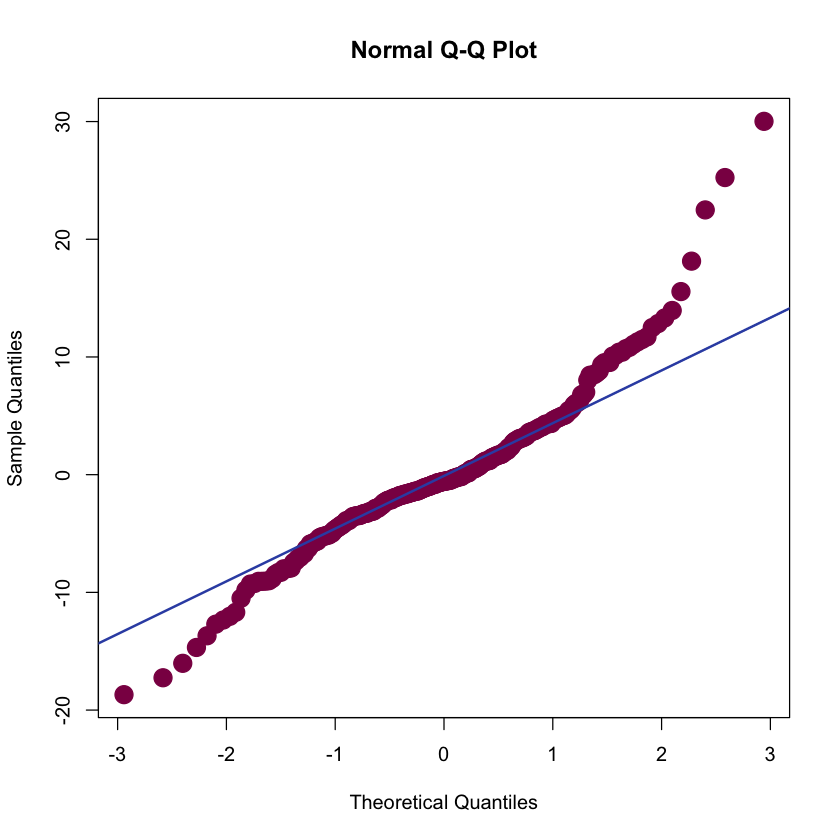

In [155]:
#normalidad
par(bg = "white")

qqnorm(modelo_lm$residuals,pch =19,col ="#8c0052", cex=2)
qqline(modelo_lm$residuals , col = "#3650b2", lwd = 2 )  

# Statistical Test
lillie.test(modelo_lm$residuals)

Dado que el p-value es inferior a 0.05, los errores no se distribuyen de manera normal


	studentized Breusch-Pagan test

data:  modelo_lm
BP = 26.971, df = 2, p-value = 1.391e-06


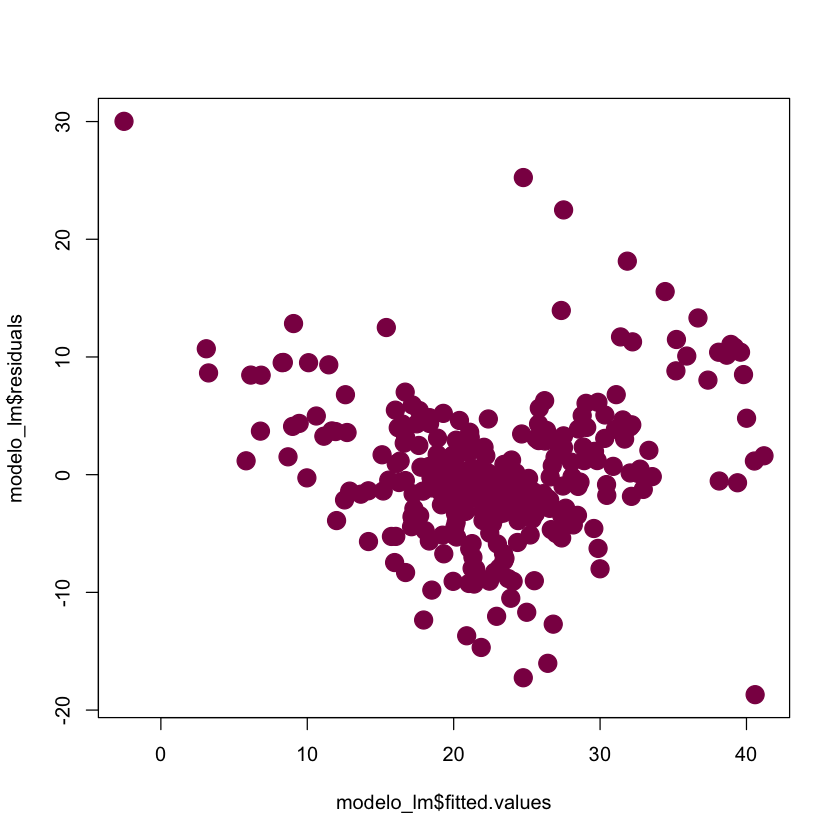

In [156]:
#Homocedasticidad
par(bg="white")
plot(modelo_lm$fitted.values , modelo_lm$residuals , pch =19,col ="#8c0052", cex=2 )

bptest(modelo_lm)

Nuevamente, el p-value es menor a 0.05, por lo que los errores no presentan varianza constante, por ende no cumplen con la homocedasticidad


	Durbin-Watson test

data:  modelo_lm
DW = 0.89484, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0


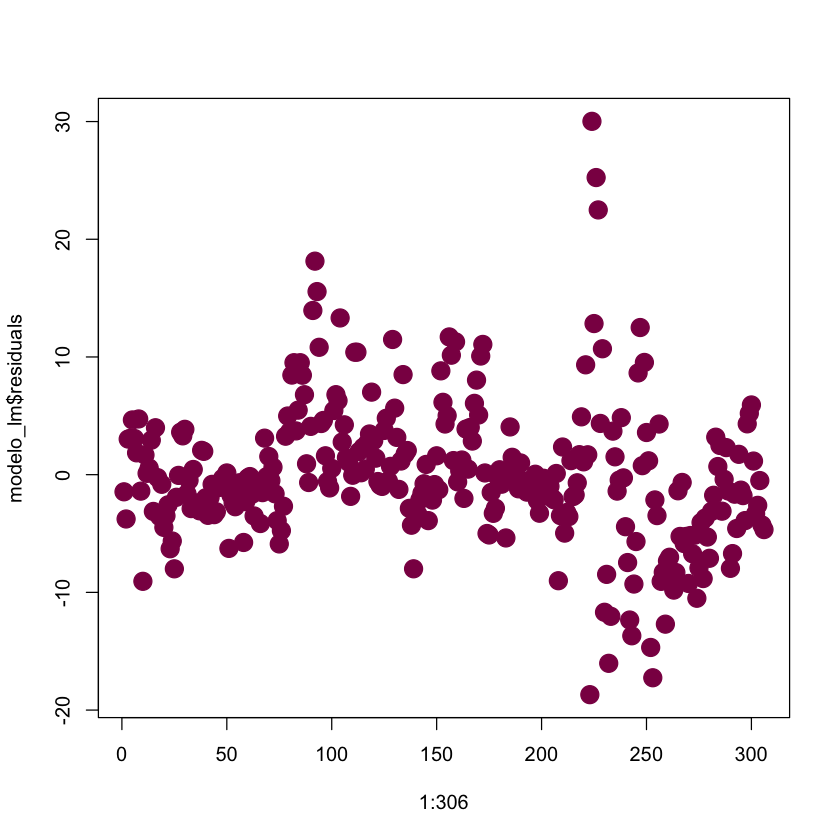

In [157]:
#autocorrelación
# Visualization
par(bg="white")
plot(1:306 , modelo_lm$residuals, pch =19,col ="#8c0052", cex=2)

# Statistical Test
dwtest(modelo_lm,  alternative = c("two.sided"))

Nuevamente, el p-value es menor a 0.05, por lo que los errores estan correlacionados, no cumpliendo con los supuestos de regresión.

In [158]:
#media de errores
mean(modelo_lm$residuals)

[1] -1.061214e-16

Por último, la media de errores es prácticamente zero, por lo que éste supuesto si que se cumple.

Aún así, los demás supuestos no se han cumplido, por lo que podemos concluir que los supuestos de regresión lineal no se han cumplido. 

Esto implica que los resultados obtenidos del modelo pueden ser sesgados o ineficientes, y las inferencias estadísticas pueden ser problemáticas. 

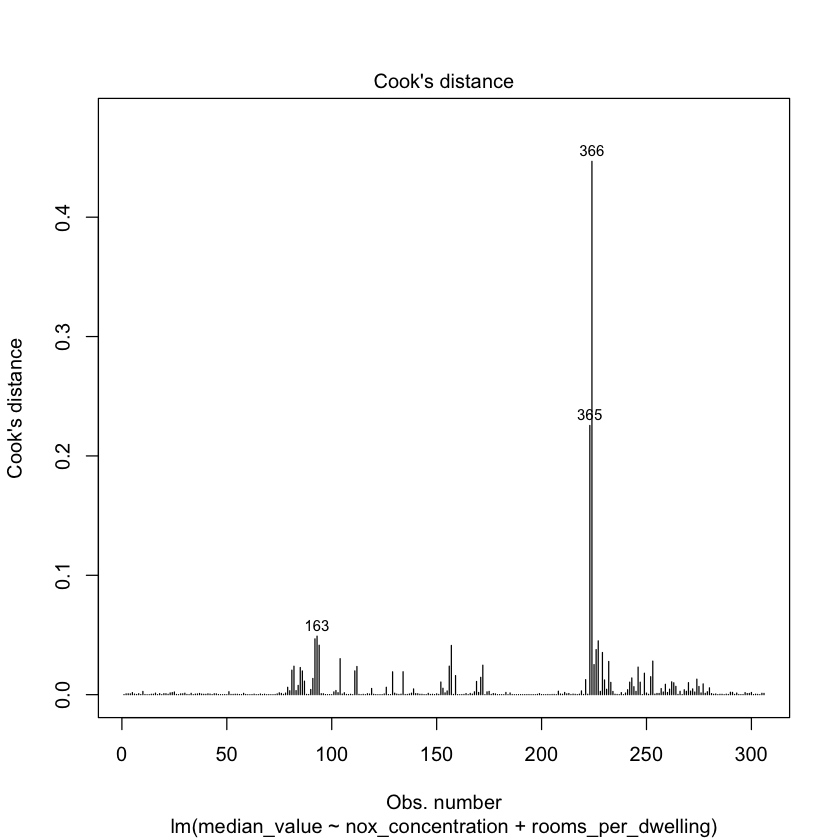

In [159]:
#outliers
par(bg = "white")
plot(modelo_lm , 4)

model_dm = augment(modelo_lm)

In [160]:
max(model_dm$.cooksd)
print(4/306)

[1] 0.4467866

[1] 0.0130719


Gracias a la distancia de Cook, podemos ver como la máxima distancia presente en el modelo es superior a 4/n, siendo n el número de muestras presentes en data_train. Por lo que, para acabar de rematar, también tenemos presencia de outliers.

R2,RMSE,MAE
0.4786492,6.666545,4.357535


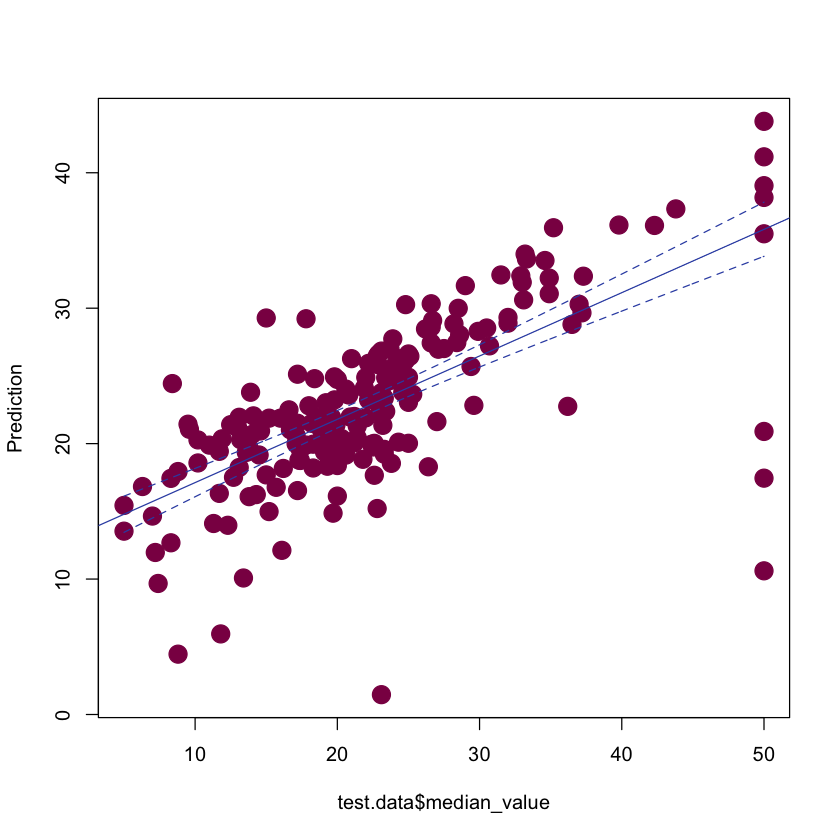

In [161]:
#Validación
par(bg="white")
# Making prediction

prediction = predict(modelo_lm, data_test)

### Visualization
plot(data_test$median_value, prediction, xlab="test.data$median_value", ylab="Prediction", pch =19,col ="#8c0052", cex=2)

#add fitted regression line
lm.out = lm(prediction ~ median_value, data = data_test)
newx = seq(min(data_test$median_value),max(data_test$median_value),by = 0.05)
conf_interval = predict(lm.out, newdata=data.frame(median_value=newx), interval="confidence", level = 0.95)
abline(lm.out, col = "#3650b2")

#add conf_interval lines
lines(newx, conf_interval[,2], col="#3650b2", lty=2)
lines(newx, conf_interval[,3], col="#3650b2", lty=2)

# Statistical Measure
data.frame( R2 = R2(prediction, data_test$median_value),
            RMSE = RMSE(prediction, data_test$median_value),
            MAE = MAE(prediction, data_test$median_value))

Para terminar, el gráfico de median_value (precio de la vivienda) frente a la predición, nos deja entrever como hay outliers que no se ajustan correctamente con el modelo, es decir, que no son predecidos por este. Aún así, una mayoria si que se podrian describir gracias al modelo. De hecho, el modelo describe que 50% (aprox) de la variabilidad del precio de la vivienda se explica con las variables explicativas escogidas, por lo que el modelo deja un poco de desear.

Dicho esto, aunque se ajuste mejor que en el modelo visto en el ejercicio 4, personalmente no lo usaria, ya que el R2 es muy bajo para la variable que queremos describir (precio medio de la vivienda), es decir, dinero. Cuando se habla de dinero, y queremos usar un modelo para que pueda predecir dicha cifra, mejor que esté bien ajustado.

